In [102]:
import warnings

# Игнорирование FutureWarning и UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
DATASET = r'dataset\\Первичная выгрузка Станки Загрузка по дням.xlsx'

In [105]:
df = pd.read_excel(DATASET)

In [106]:
# Заново загружаем данные
import pandas as pd


# Загружаем данные из единственного листа
data = df

# Преобразуем столбец "Дата" в формат datetime
data["Дата"] = pd.to_datetime(data["Дата"])

# Определим целевые переменные
target_columns = ["Аварийная остановка, ч.", "Программа выполняется, ч."]

# Определяем экзогенные переменные (все числовые, кроме целевых)
exog_columns = [col for col in data.select_dtypes(include=['number']).columns if col not in target_columns]

# Заполним пропущенные значения нулями в экзогенных переменных
data[exog_columns] = data[exog_columns].fillna(0)

# Агрегируем данные по дням (суммируем все значения)
df_aggregated = data.groupby("Дата").sum()

# Выводим список экзогенных переменных
exog_columns


['Прогрев станка, ч.',
 'Серийное производство, ч.',
 'Отработка программы, ч.',
 'Ручной режим, ч.',
 'Станок под нагрузкой, ч.',
 'Авария, ч.',
 'Отсутствие КД/модели, ч.',
 'Наладка, ч.',
 'Отсутствие программы, ч.',
 'Контроль ОТК, ч.',
 'Отсутствие инструмента, ч.',
 'Сервисное обслуживание, ч.',
 'Отсутствие заготовки, ч.',
 'Ремонтные работы, ч.',
 'ППР, ч.',
 'Регламентированный перерыв, ч.',
 'Уборка оборудования, ч.',
 'Станок включен, работы не производятся, ч.',
 'Станок выключен, ч.']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24291 entries, 0 to 24290
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Объект                                      24291 non-null  object        
 1   Дата                                        24290 non-null  datetime64[ns]
 2   Аварийная остановка, ч.                     24057 non-null  float64       
 3   Прогрев станка, ч.                          24291 non-null  float64       
 4   Серийное производство, ч.                   24291 non-null  float64       
 5   Отработка программы, ч.                     24291 non-null  float64       
 6   Ручной режим, ч.                            24291 non-null  float64       
 7   Станок под нагрузкой, ч.                    24291 non-null  float64       
 8   Программа выполняется, ч.                   24057 non-null  float64       
 9   Авария

In [108]:
df = df.iloc[:-1]
df.describe()

Дата  Аварийная остановка, ч.  Прогрев станка, ч.  \
count                24290             24056.000000        24290.000000   
mean   2024-06-22 00:00:00                 0.156503            0.043197   
min    2024-01-01 00:00:00                 0.000000            0.000000   
25%    2024-03-27 00:00:00                 0.000000            0.000000   
50%    2024-06-22 00:00:00                 0.000000            0.000000   
75%    2024-09-17 00:00:00                 0.000000            0.000000   
max    2024-12-12 00:00:00                30.999000           19.975000   
std                    NaN                 1.508417            0.528492   

       Серийное производство, ч.  Отработка программы, ч.  Ручной режим, ч.  \
count               24290.000000             24290.000000      24290.000000   
mean                    2.647993                 0.608055          0.004105   
min                     0.000000                 0.000000          0.000000   
25%                     0.000000                 0.000000          0.000000   
50%                     0.000000                 0.000000          0.000000   
75%                     0.000000                 0.000000          0.000000   
max                    30.999000                30.996000         15.488000   
std                     5.830727                 3.001249          0.155988   

       Станок под нагрузкой, ч.  Программа выполняется, ч.    Авария, ч.  \
count              24290.000000               24056.000000  24290.000000   
mean                   0.196245                   5.299193      0.000654   
min                    0.000000                   0.000000      0.000000   
25%                    0.000000                   0.000000      0.000000   
50%                    0.000000                   0.889000      0.000000   
75%                    0.000000                   8.949250      0.000000   
max                   20.111000                  31.999000      5.907000   
std                    1.085914                   7.090754      0.045685   

       Отсутствие КД/модели, ч.  ...  Контроль ОТК, ч.  \
count              24290.000000  ...      24290.000000   
mean                   0.000184  ...          0.007784   
min                    0.000000  ...          0.000000   
25%                    0.000000  ...          0.000000   
50%                    0.000000  ...          0.000000   
75%                    0.000000  ...          0.000000   
max                    2.722000  ...         12.331000   
std                    0.020390  ...          0.156826   

       Отсутствие инструмента, ч.  Сервисное обслуживание, ч.  \
count                24290.000000                2.429000e+04   
mean                     0.007808                8.233841e-08   
min                      0.000000                0.000000e+00   
25%                      0.000000                0.000000e+00   
50%                      0.000000                0.000000e+00   
75%                      0.000000                0.000000e+00   
max                     12.402000                2.000000e-03   
std                      0.195675                1.283265e-05   

       Отсутствие заготовки, ч.  Ремонтные работы, ч.       ППР, ч.  \
count              24290.000000          24290.000000  24290.000000   
mean                   0.001893              0.000175      0.007151   
min                    0.000000              0.000000      0.000000   
25%                    0.000000              0.000000      0.000000   
50%                    0.000000              0.000000      0.000000   
75%                    0.000000              0.000000      0.000000   
max                   11.185000              2.558000     23.263000   
std                    0.113137              0.017606      0.325019   

       Регламентированный перерыв, ч.  Уборка оборудования, ч.  \
count                    24290.000000             24290.000000   
mean                         0.405658                 0.006182   
mi

In [109]:
df.isna().sum()

Объект                                          0
Дата                                            0
Аварийная остановка, ч.                       234
Прогрев станка, ч.                              0
Серийное производство, ч.                       0
Отработка программы, ч.                         0
Ручной режим, ч.                                0
Станок под нагрузкой, ч.                        0
Программа выполняется, ч.                     234
Авария, ч.                                      0
Отсутствие КД/модели, ч.                        0
Наладка, ч.                                     0
Отсутствие программы, ч.                        0
Контроль ОТК, ч.                                0
Отсутствие инструмента, ч.                      0
Сервисное обслуживание, ч.                      0
Отсутствие заготовки, ч.                        0
Ремонтные работы, ч.                            0
ППР, ч.                                         0
Регламентированный перерыв, ч.                  0


In [110]:
df = df.fillna(0)

In [111]:
df.isna().sum()

Объект                                        0
Дата                                          0
Аварийная остановка, ч.                       0
Прогрев станка, ч.                            0
Серийное производство, ч.                     0
Отработка программы, ч.                       0
Ручной режим, ч.                              0
Станок под нагрузкой, ч.                      0
Программа выполняется, ч.                     0
Авария, ч.                                    0
Отсутствие КД/модели, ч.                      0
Наладка, ч.                                   0
Отсутствие программы, ч.                      0
Контроль ОТК, ч.                              0
Отсутствие инструмента, ч.                    0
Сервисное обслуживание, ч.                    0
Отсутствие заготовки, ч.                      0
Ремонтные работы, ч.                          0
ППР, ч.                                       0
Регламентированный перерыв, ч.                0
Уборка оборудования, ч.                 

In [112]:
df['Аварийная остановка, ч.'] = df['Аварийная остановка, ч.'].astype(str).str.replace(',', '.').astype(float)

In [113]:
df.to_excel("processed_data.xlsx", index=False, engine='openpyxl')

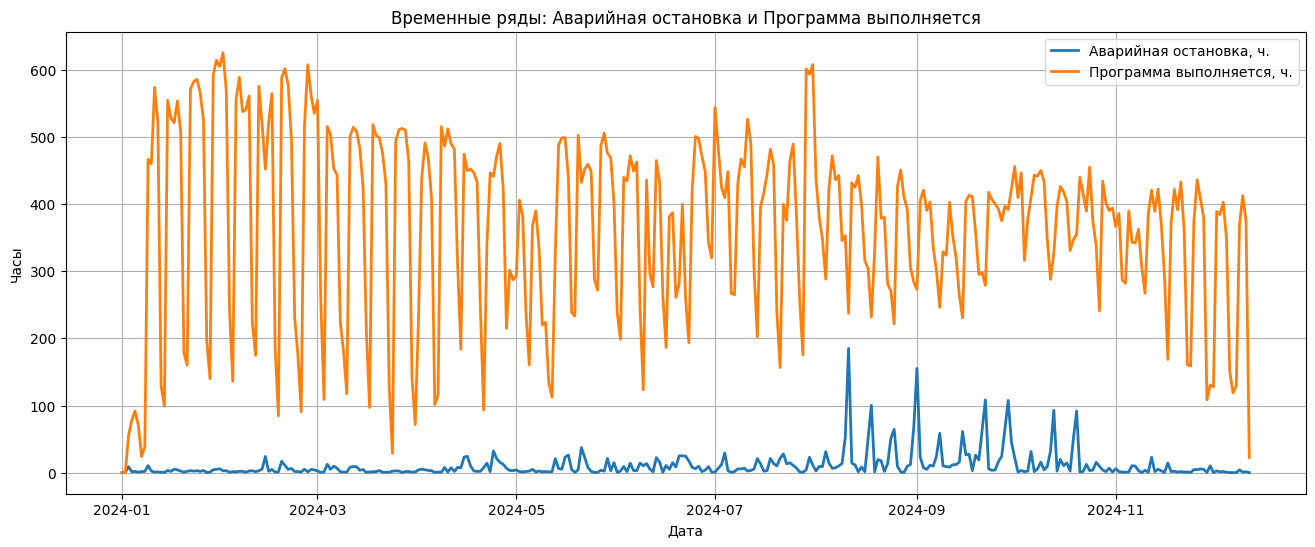

In [84]:
# # Преобразуем столбец "Дата" в формат datetime
# df['Дата'] = pd.to_datetime(df['Дата'])

# Агрегируем данные по дате (берем сумму значений по всем объектам)
df_aggregated = df.groupby('Дата')[['Аварийная остановка, ч.', 'Программа выполняется, ч.']].sum()

# Строим график временного ряда
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(df_aggregated.index, df_aggregated['Аварийная остановка, ч.'], label="Аварийная остановка, ч.", linewidth=2)
plt.plot(df_aggregated.index, df_aggregated['Программа выполняется, ч.'], label="Программа выполняется, ч.", linewidth=2)
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.title("Временные ряды: Аварийная остановка и Программа выполняется")
plt.legend()
plt.grid(True)
plt.show()


In [85]:
from statsmodels.tsa.stattools import adfuller

def check_stationary(column):
    result = adfuller(column.dropna())
    p_value = result[1]

    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {p_value}")
    print(f"Used Lags: {result[2]}")
    print(f"Number of Observations: {result[3]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    
    if p_value < 0.05:
        print(f'Ряд является стационарным')
    else:
        print(f'Ряд не является стационарным')

check_stationary(df_aggregated['Аварийная остановка, ч.'])
check_stationary(df_aggregated['Программа выполняется, ч.'])

ADF Statistic: -2.1844962124585563
p-value: 0.2119204789058649
Used Lags: 13
Number of Observations: 333
Critical Values:
   1%: -3.450141065277327
   5%: -2.870258846235788
   10%: -2.571415151457764
Ряд не является стационарным
ADF Statistic: -2.179162681641589
p-value: 0.21389492896947093
Used Lags: 14
Number of Observations: 332
Critical Values:
   1%: -3.4502011472639724
   5%: -2.8702852297358983
   10%: -2.5714292194077513
Ряд не является стационарным


In [86]:
df_aggregated['Аварийная остановка, ч.'] = df_aggregated['Аварийная остановка, ч.'].diff().dropna()
df_aggregated['Программа выполняется, ч.'] = df_aggregated['Программа выполняется, ч.'].diff().dropna()
check_stationary(df_aggregated['Аварийная остановка, ч.'])
check_stationary(df_aggregated['Программа выполняется, ч.'])

ADF Statistic: -9.065415143675626
p-value: 4.446407557448097e-15
Used Lags: 12
Number of Observations: 333
Critical Values:
   1%: -3.450141065277327
   5%: -2.870258846235788
   10%: -2.571415151457764
Ряд является стационарным
ADF Statistic: -7.539565999364586
p-value: 3.406454853194566e-11
Used Lags: 13
Number of Observations: 332
Critical Values:
   1%: -3.4502011472639724
   5%: -2.8702852297358983
   10%: -2.5714292194077513
Ряд является стационарным


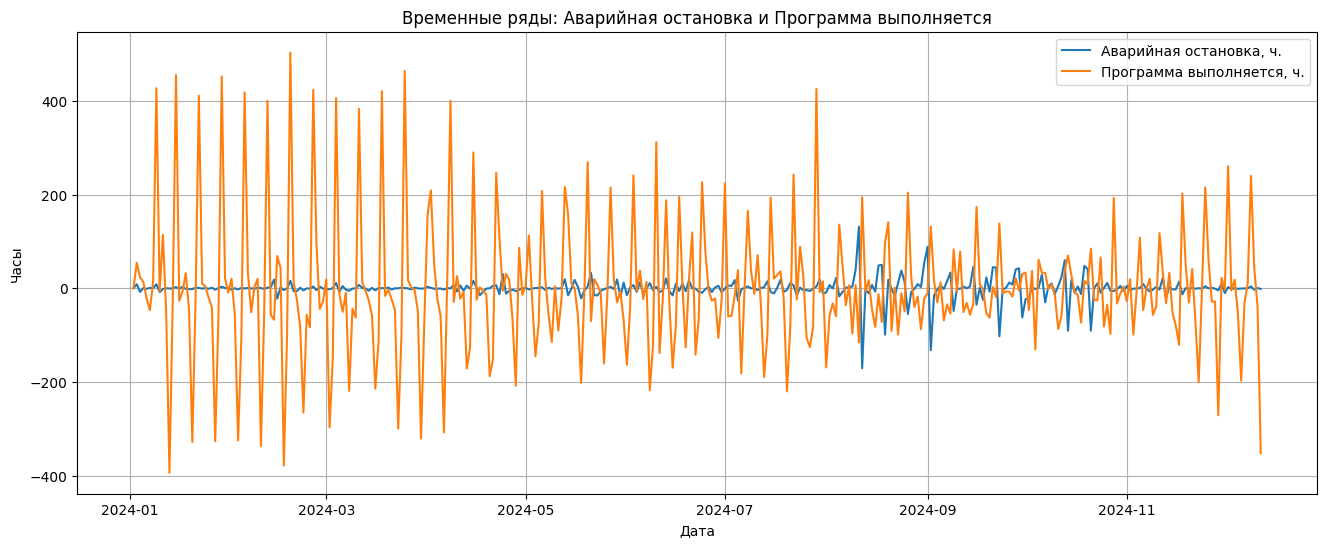

In [87]:
plt.figure(figsize=(16, 6))
plt.plot(df_aggregated.index, df_aggregated['Аварийная остановка, ч.'], label="Аварийная остановка, ч.")
plt.plot(df_aggregated.index, df_aggregated['Программа выполняется, ч.'], label="Программа выполняется, ч.")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.title("Временные ряды: Аварийная остановка и Программа выполняется")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [89]:
def decompose_df(df, column_names, model='additive', period=30):
    for col in column_names:
        series = df[col].dropna()
        decompose_result = seasonal_decompose(series, model=model, period=period)

        fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
        components = [("Observed", series, "black"),
                      ("Trend", decompose_result.trend, "blue"),
                      ("Seasonality", decompose_result.seasonal, "green"),
                      ("Residuals", decompose_result.resid, "red")]

        for i, (label, data, color) in enumerate(components):
            axes[i].plot(data, label=label, color=color)
            axes[i].legend()
            axes[i].set_ylabel(label)
            axes[i].grid(True)

        plt.suptitle(f"Сезонная декомпозиция временного ряда '{col}'", fontsize=16)
        plt.show()
        
def decompose_df_stl(df, column_names, seasonal=13, robust=False):
    for col in column_names:
        series = df[col].dropna()
        stl = STL(series, seasonal=seasonal, robust=robust)
        decompose_result = stl.fit()

        fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
        components = [("Observed", series, "black"),
                      ("Trend", decompose_result.trend, "blue"),
                      ("Seasonality", decompose_result.seasonal, "green"),
                      ("Residuals", decompose_result.resid, "red")]

        for i, (label, data, color) in enumerate(components):
            axes[i].plot(data, label=label, color=color)
            axes[i].legend()
            axes[i].set_ylabel(label)
            axes[i].grid(True)

        plt.suptitle(f"STL-декомпозиция временного ряда '{col}'", fontsize=16)
        plt.show()

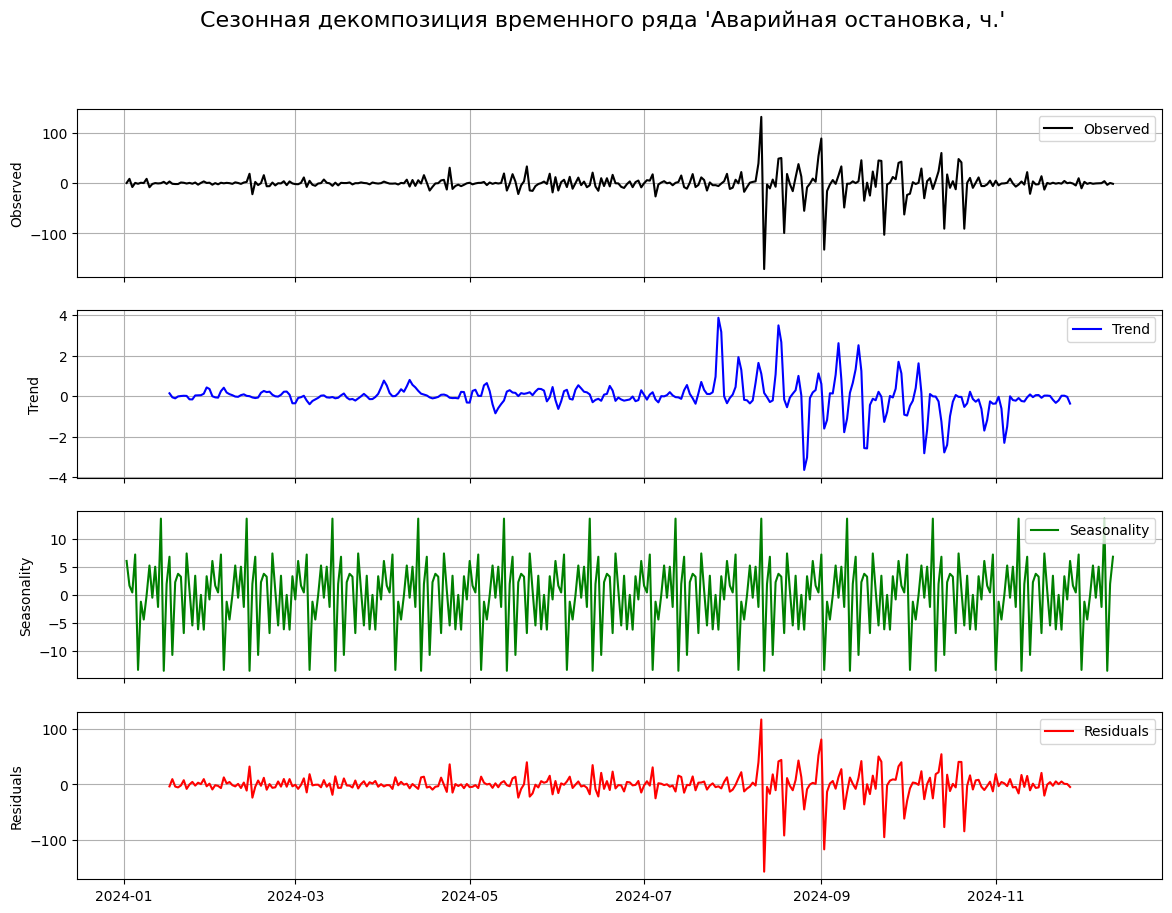

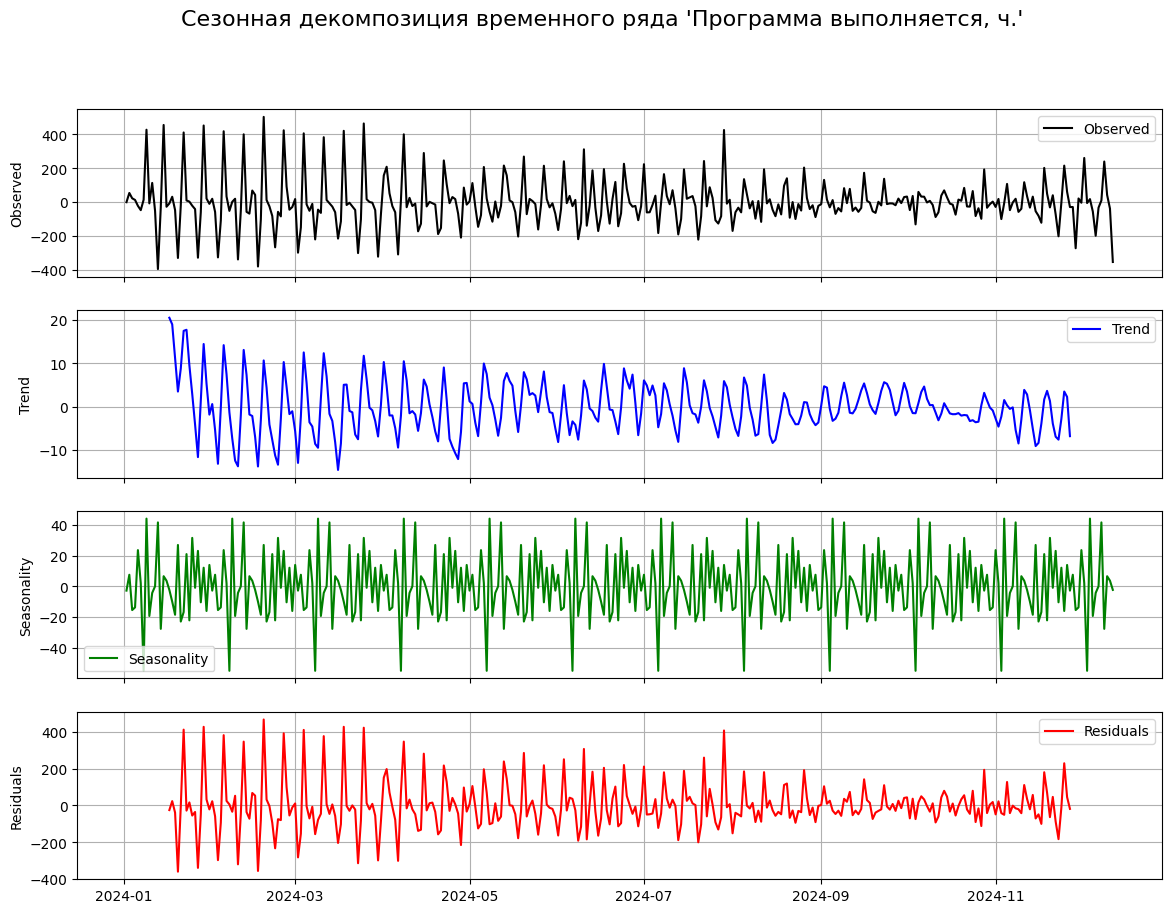

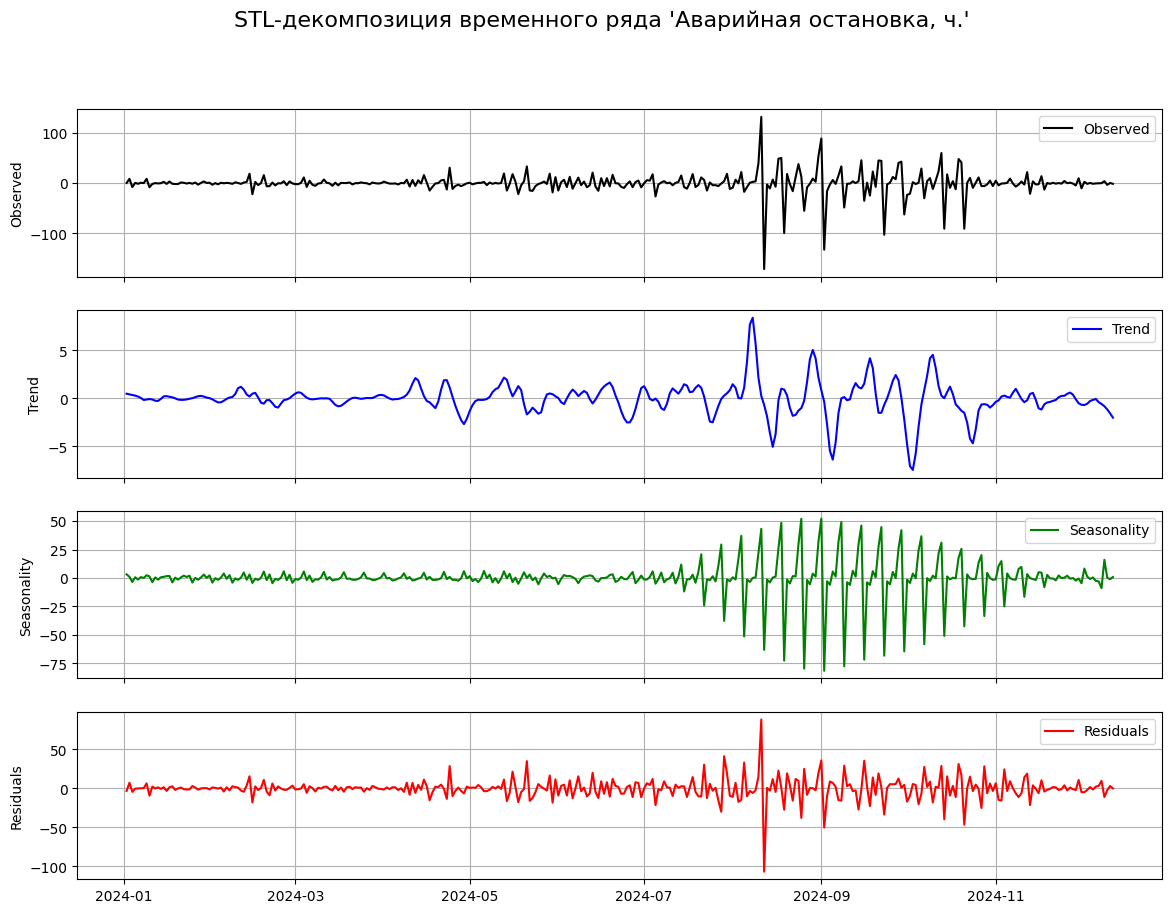

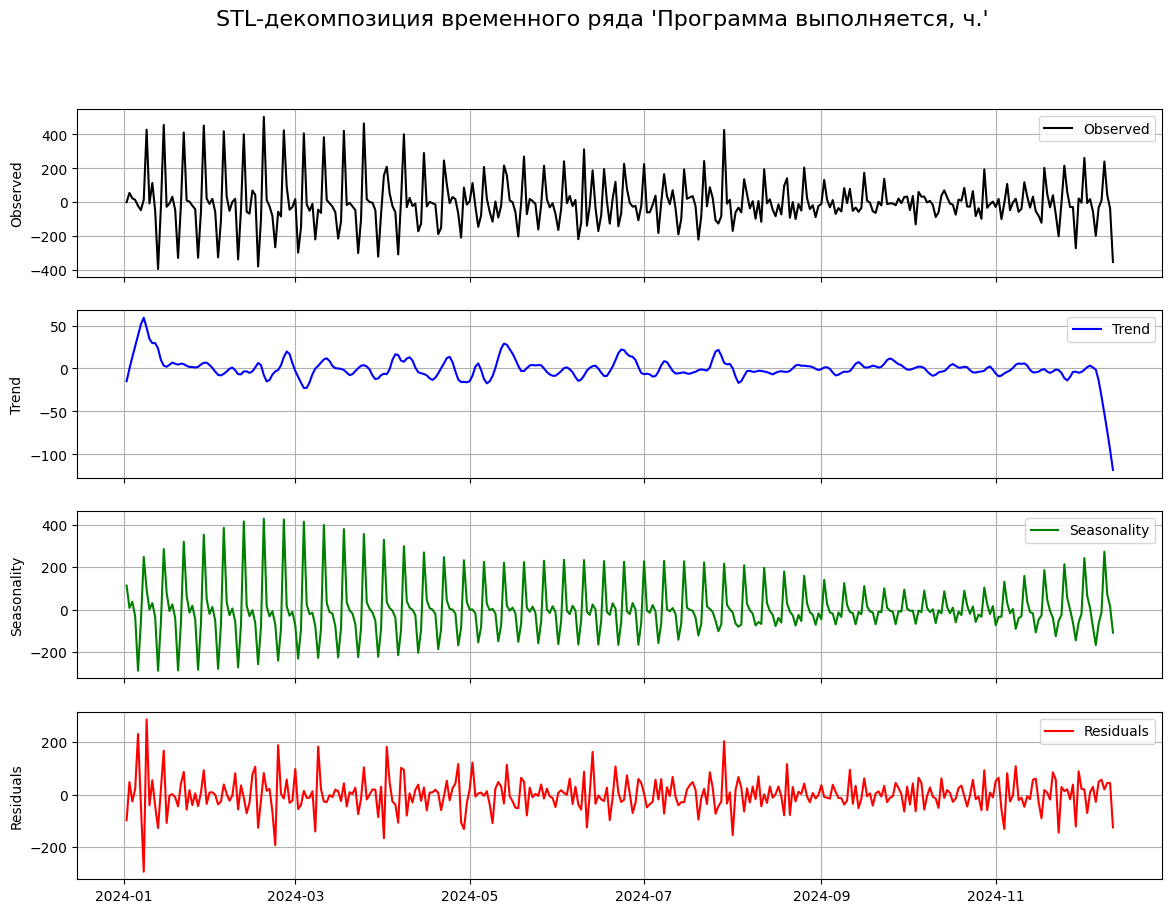

In [90]:
column_names = ["Аварийная остановка, ч.", "Программа выполняется, ч."]
decompose_df(df_aggregated, column_names)
decompose_df_stl(df_aggregated, column_names)

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def built_acf_and_pacf(df, column_names):
    for col in column_names:
        series = df[col].dropna()  # Берем только один столбец и удаляем NaN

        # Строим ACF и PACF
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        plot_acf(series, lags=30, ax=axes[0])  # ACF для выбора q
        axes[0].set_title("ACF - Автокорреляция")

        plot_pacf(series, lags=30, ax=axes[1])  # PACF для выбора p
        axes[1].set_title("PACF - Частичная автокорреляция")

        # Добавляем общий заголовок
        fig.suptitle(f"ACF и PACF для '{col}'", fontsize=14)

        plt.show()  # Отображаем графики

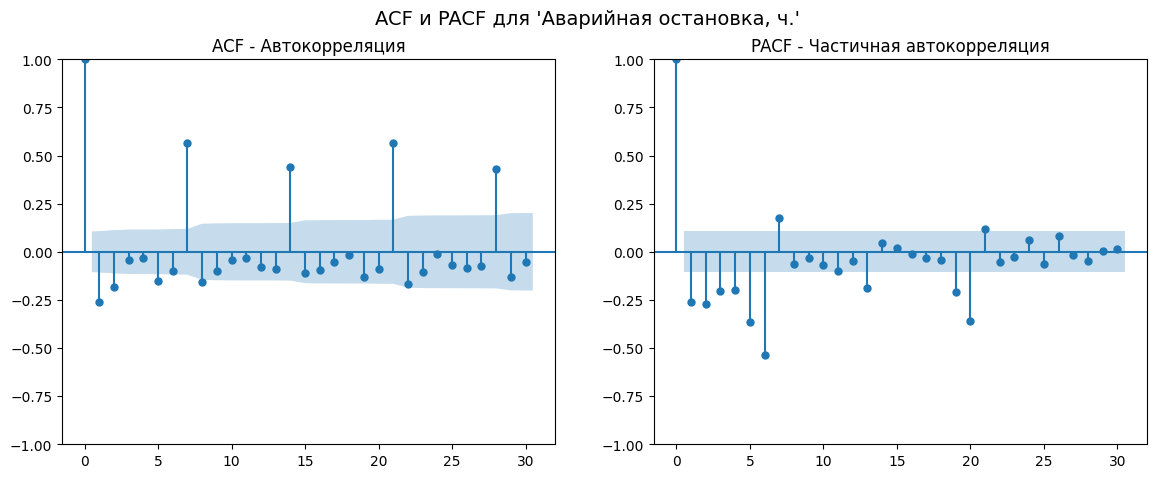

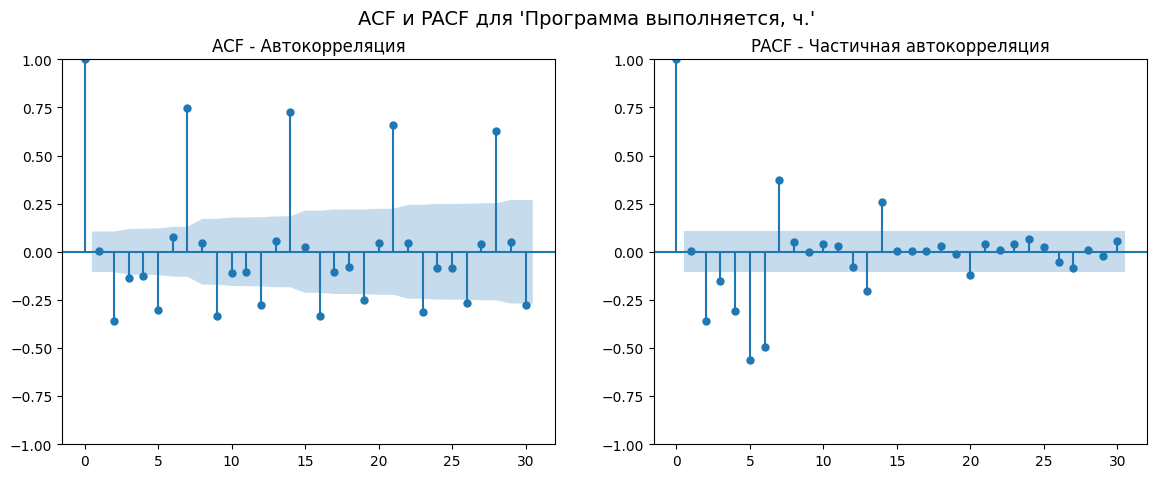

In [92]:
built_acf_and_pacf(df_aggregated, column_names)

In [93]:
df_aggregated.isna().sum()

Аварийная остановка, ч.      1
Программа выполняется, ч.    1
dtype: int64

In [94]:
df_aggregated = df_aggregated.dropna()

In [95]:
df_aggregated.isna().sum()

Аварийная остановка, ч.      0
Программа выполняется, ч.    0
dtype: int64

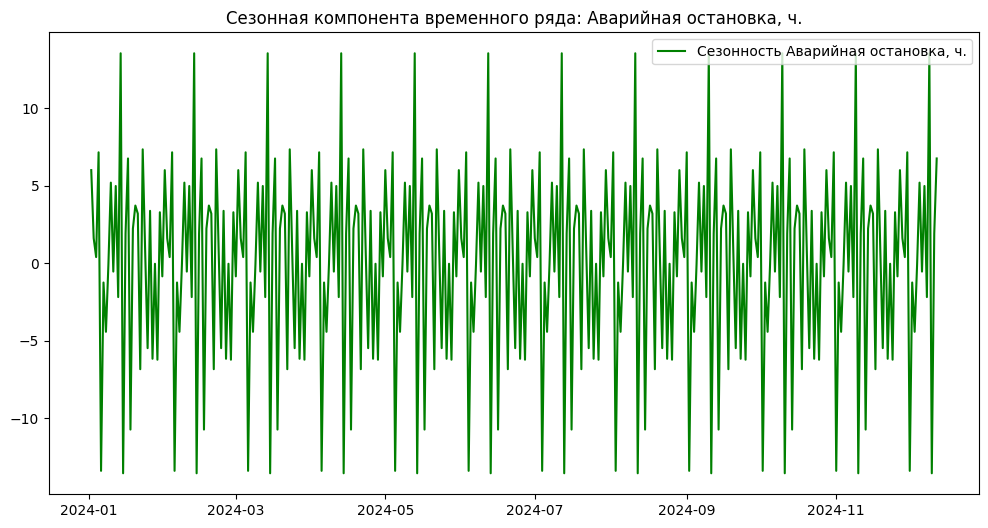

<Figure size 1200x600 with 0 Axes>

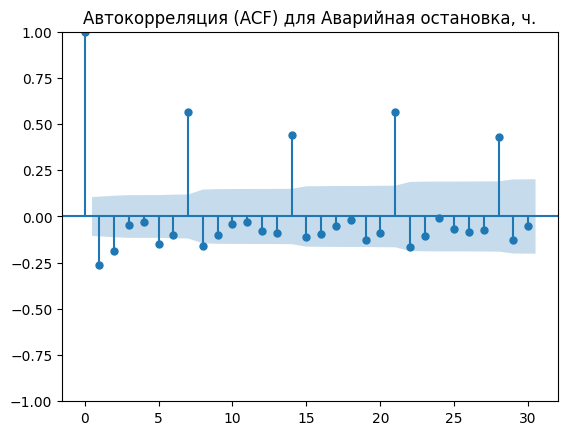

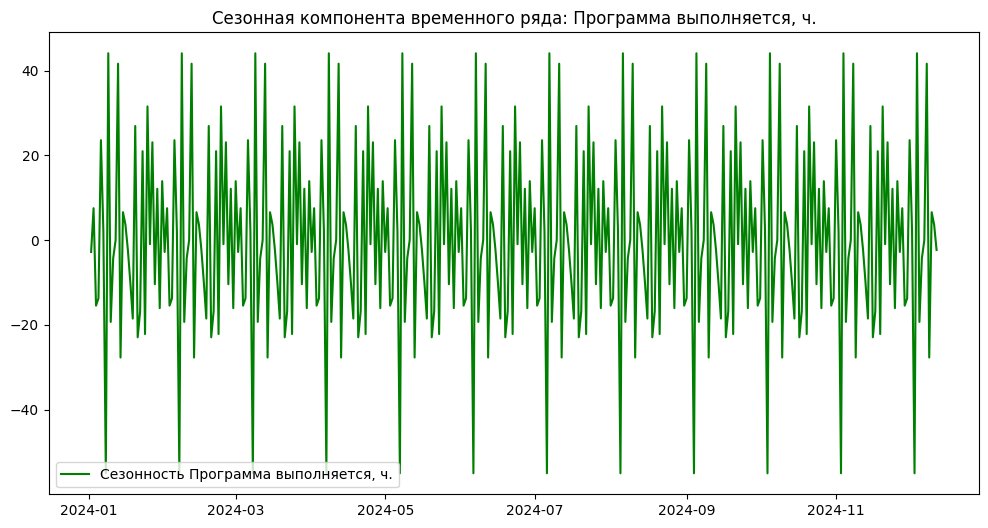

<Figure size 1200x600 with 0 Axes>

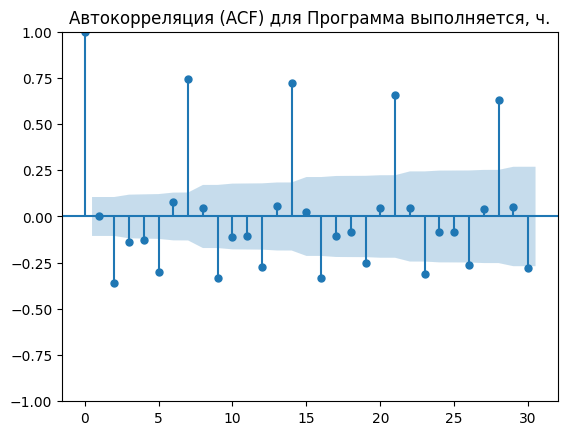

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Выбор данных
columns_to_forecast = ["Аварийная остановка, ч.", "Программа выполняется, ч."]

# Анализ сезонности
for column in columns_to_forecast:
    result = seasonal_decompose(df_aggregated[column], model='additive', period=30)  # Проверяем месячную сезонность

    # Графики сезонности
    plt.figure(figsize=(12, 6))
    plt.plot(result.seasonal, label=f'Сезонность {column}', color='green')
    plt.title(f'Сезонная компонента временного ряда: {column}')
    plt.legend()
    plt.show()

    # ACF для определения сезонности
    plt.figure(figsize=(12, 6))
    plot_acf(df_aggregated[column].dropna(), lags=30)
    plt.title(f'Автокорреляция (ACF) для {column}')
    plt.show()


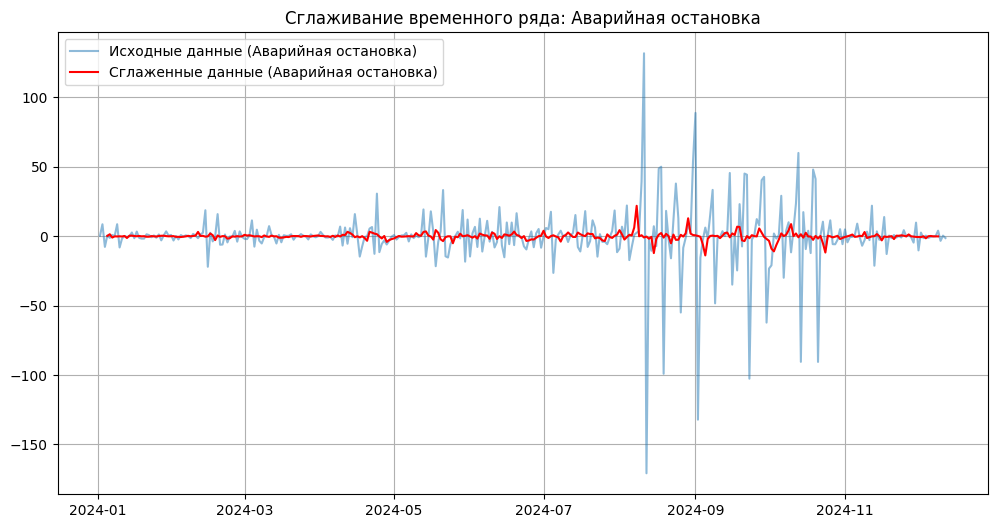

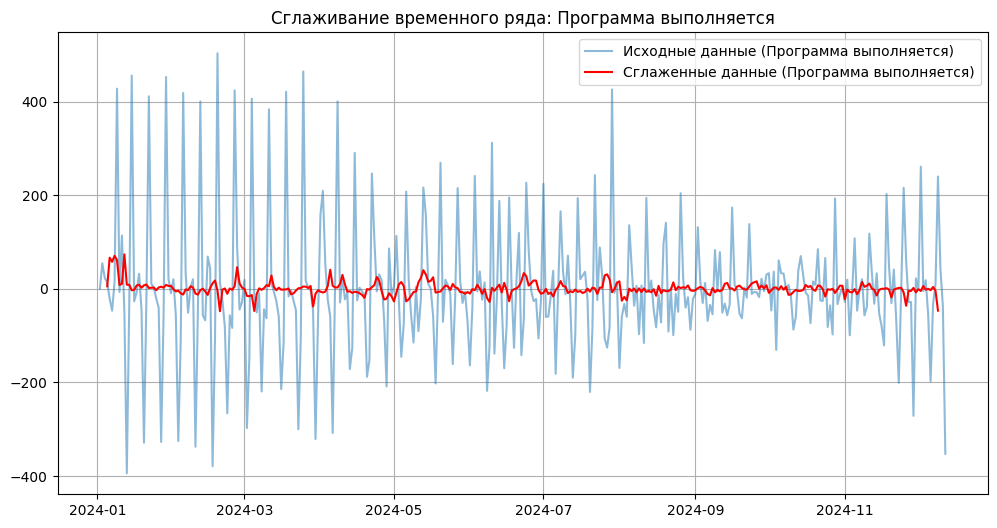

In [97]:
# Применение скользящего среднего для сглаживания
df_smoothed = df_aggregated.copy()
df_smoothed["Аварийная остановка, ч."] = df_aggregated["Аварийная остановка, ч."].rolling(window=7, center=True).mean()
df_smoothed["Программа выполняется, ч."] = df_aggregated["Программа выполняется, ч."].rolling(window=7, center=True).mean()

# Удаление пропущенных значений после сглаживания
df_smoothed = df_smoothed.dropna()

# Визуализация сглаженных данных
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_aggregated["Аварийная остановка, ч."], label="Исходные данные (Аварийная остановка)", alpha=0.5)
plt.plot(df_smoothed["Аварийная остановка, ч."], label="Сглаженные данные (Аварийная остановка)", color="red")
plt.title("Сглаживание временного ряда: Аварийная остановка")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_aggregated["Программа выполняется, ч."], label="Исходные данные (Программа выполняется)", alpha=0.5)
plt.plot(df_smoothed["Программа выполняется, ч."], label="Сглаженные данные (Программа выполняется)", color="red")
plt.title("Сглаживание временного ряда: Программа выполняется")
plt.legend()
plt.grid()
plt.show()

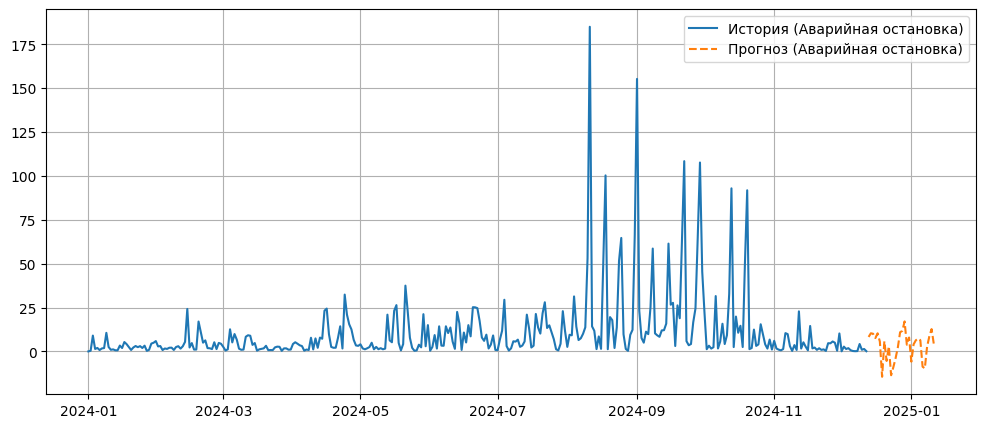

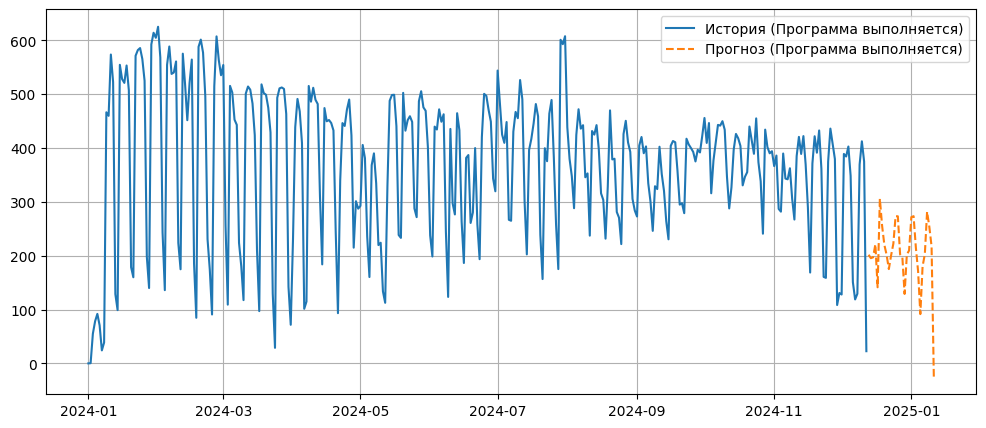

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                       SARIMAX Results                                      
 Dep. Variable:             Аварийная остановка, ч.   No. Observations:                  347
 Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -1311.286
 Date:                             Tue, 21 Jan 2025   AIC                           2674.573
 Time:                                     14:55:46   BIC                           2773.270
 Sample:                                 01-01-2024   HQIC                          2713.946
                                       - 12-12-2024                                         
 Covariance Type:                               opg                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------------------------------

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Определяем параметры модели
order = (2, 1, 2)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s)

# Обучаем SARIMAX для "Аварийная остановка, ч." с экзогенными переменными
sarima_ao = SARIMAX(df_aggregated["Аварийная остановка, ч."], 
                    order=order, 
                    seasonal_order=seasonal_order, 
                    exog=df_aggregated[exog_columns],
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()

# Обучаем SARIMAX для "Программа выполняется, ч." с экзогенными переменными
sarima_prog = SARIMAX(df_aggregated["Программа выполняется, ч."], 
                      order=order, 
                      seasonal_order=seasonal_order, 
                      exog=df_aggregated[exog_columns],
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Выводим краткие результаты моделей
summary_ao = sarima_ao.summary()
summary_prog = sarima_prog.summary()

# Прогноз на следующий месяц (30 дней)
future_exog = df_aggregated[exog_columns].iloc[-30:]  # Берем последние 30 дней экзогенных данных для прогноза

forecast_ao = sarima_ao.forecast(steps=30, exog=future_exog)
forecast_prog = sarima_prog.forecast(steps=30, exog=future_exog)

# Визуализация прогнозов
plt.figure(figsize=(12, 5))
plt.plot(df_aggregated["Аварийная остановка, ч."], label="История (Аварийная остановка)")
plt.plot(forecast_ao, label="Прогноз (Аварийная остановка)", linestyle="dashed")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df_aggregated["Программа выполняется, ч."], label="История (Программа выполняется)")
plt.plot(forecast_prog, label="Прогноз (Программа выполняется)", linestyle="dashed")
plt.legend()
plt.grid(True)
plt.show()

# Отображение результатов
summary_ao, summary_prog


In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Анализ значимости коэффициентов

# Получаем p-значения коэффициентов модели SARIMAX
p_values_ao = sarima_ao.pvalues
p_values_prog = sarima_prog.pvalues

# Оставляем только экзогенные переменные
p_values_ao_exog = p_values_ao[exog_columns]
p_values_prog_exog = p_values_prog[exog_columns]

# 2. Оценка точности прогноза

# Разделим данные на тренировочную и тестовую выборки (последние 30 дней тестовые)
train_size = len(df_aggregated) - 30

train_ao = df_aggregated.iloc[:train_size]
test_ao = df_aggregated.iloc[train_size:]

train_prog = df_aggregated.iloc[:train_size]
test_prog = df_aggregated.iloc[train_size:]

# Обучение SARIMAX на тренировочных данных
sarima_ao_train = SARIMAX(train_ao["Аварийная остановка, ч."], 
                          order=order, 
                          seasonal_order=seasonal_order, 
                          exog=train_ao[exog_columns],
                          enforce_stationarity=False,
                          enforce_invertibility=False).fit()

sarima_prog_train = SARIMAX(train_prog["Программа выполняется, ч."], 
                            order=order, 
                            seasonal_order=seasonal_order, 
                            exog=train_prog[exog_columns],
                            enforce_stationarity=False,
                            enforce_invertibility=False).fit()

# Прогноз на тестовые данные
forecast_ao_test = sarima_ao_train.forecast(steps=30, exog=test_ao[exog_columns])
forecast_prog_test = sarima_prog_train.forecast(steps=30, exog=test_prog[exog_columns])

# Вычисляем ошибки
mae_ao = mean_absolute_error(test_ao["Аварийная остановка, ч."], forecast_ao_test)
rmse_ao = np.sqrt(mean_squared_error(test_ao["Аварийная остановка, ч."], forecast_ao_test))

mae_prog = mean_absolute_error(test_prog["Программа выполняется, ч."], forecast_prog_test)
rmse_prog = np.sqrt(mean_squared_error(test_prog["Программа выполняется, ч."], forecast_prog_test))

# 3. Вывод результатов


# Вывод p-значений экзогенных переменных
p_values_df = pd.DataFrame({
    "P-value (Аварийная остановка, ч.)": p_values_ao_exog,
    "P-value (Программа выполняется, ч.)": p_values_prog_exog
})

# Вывод ошибок
errors_df = pd.DataFrame({
    "Метрика": ["MAE", "RMSE"],
    "Аварийная остановка, ч.": [mae_ao, rmse_ao],
    "Программа выполняется, ч.": [mae_prog, rmse_prog]
})

# Отображаем таблицы
display(p_values_df)
display(errors_df)


P-value (Аварийная остановка, ч.)  \
Прогрев станка, ч.                                               4.257229e-01   
Серийное производство, ч.                                        6.811314e-01   
Отработка программы, ч.                                          3.609357e-01   
Ручной режим, ч.                                                 9.541713e-01   
Станок под нагрузкой, ч.                                         1.247582e-07   
Авария, ч.                                                       6.729069e-01   
Отсутствие КД/модели, ч.                                         9.003582e-01   
Наладка, ч.                                                      6.226548e-01   
Отсутствие программы, ч.                                         2.048585e-08   
Контроль ОТК, ч.                                                 7.348614e-01   
Отсутствие инструмента, ч.                                       5.084797e-01   
Сервисное обслуживание, ч.                                       9.043767e-01   
Отсутствие заготовки, ч.                                         3.167682e-01   
Ремонтные работы, ч.                                             8.777846e-01   
ППР, ч.                                                          5.006309e-01   
Регламентированный перерыв, ч.                                   2.759288e-04   
Уборка оборудования, ч.                                          5.435795e-01   
Станок включен, работы не производятся, ч.                       9.928159e-15   
Станок выключен, ч.                                              4.368291e-01   

                                            P-value (Программа выполняется, ч.)  
Прогрев станка, ч.                                                 1.164389e-03  
Серийное производство, ч.                                          1.998521e-10  
Отработка программы, ч.                                            2.339102e-02  
Ручной режим, ч.                                                   9.976751e-01  
Станок под нагрузкой, ч.                                           5.706644e-01  
Авария, ч.                                                         7.325848e-01  
Отсутствие КД/модели, ч.                                           3.450676e-01  
Наладка, ч.                                                        2.671972e-01  
Отсутствие программы, ч.                                           1.679317e-01  
Контроль ОТК, ч.                                                   9.869469e-01  
Отсутствие инструмента, ч.                                         5.000962e-01  
Сервисное обслуживание, ч.                                         5.033667e-01  
Отсутствие заготовки, ч.                                           2.534978e-01  
Ремонтные работы, ч.                                               8.373565e-01  
ППР, ч.                                                            2.123339e-01  
Регламентированный перерыв, ч.                                     1.000741e-01  
Уборка оборудования, ч.                                            8.990448e-01  
Станок включен, работы не производятся, ч.                         6.265700e-02  
Станок выключен, ч.                                                2.042886e-16

Метрика  Аварийная остановка, ч.  Программа выполняется, ч.
0     MAE                 8.109025                 276.524046
1    RMSE                10.485946                 509.899361

In [121]:
# Обновляем список экзогенных переменных на основе значимости
significant_exog_ao = ["Станок под нагрузкой, ч.", "Отсутствие программы, ч.", "Станок включен, работы не производятся, ч."]
significant_exog_prog = ["Прогрев станка, ч.", "Серийное производство, ч.", "Отработка программы, ч.", 
                          "Регламентированный перерыв, ч.", "Станок включен, работы не производятся, ч.", "Станок выключен, ч."]

# Переобучаем модель для "Аварийная остановка, ч."
sarima_ao_significant = SARIMAX(df_aggregated["Аварийная остановка, ч."], 
                                order=(2, 1, 2), 
                                seasonal_order=(1, 1, 1, 7), 
                                exog=df_aggregated[significant_exog_ao],
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

# Переобучаем модель для "Программа выполняется, ч."
sarima_prog_significant = SARIMAX(df_aggregated["Программа выполняется, ч."], 
                                  order=(2, 1, 2), 
                                  seasonal_order=(1, 1, 1, 7), 
                                  exog=df_aggregated[significant_exog_prog],
                                  enforce_stationarity=False,
                                  enforce_invertibility=False).fit()

# Прогноз на тестовой выборке
forecast_ao_test_significant = sarima_ao_significant.forecast(steps=30, exog=test_ao[significant_exog_ao])
forecast_prog_test_significant = sarima_prog_significant.forecast(steps=30, exog=test_prog[significant_exog_prog])

# Вычисляем ошибки для модели с отобранными переменными
mae_ao_significant = mean_absolute_error(test_ao["Аварийная остановка, ч."], forecast_ao_test_significant)
rmse_ao_significant = np.sqrt(mean_squared_error(test_ao["Аварийная остановка, ч."], forecast_ao_test_significant))

mae_prog_significant = mean_absolute_error(test_prog["Программа выполняется, ч."], forecast_prog_test_significant)
rmse_prog_significant = np.sqrt(mean_squared_error(test_prog["Программа выполняется, ч."], forecast_prog_test_significant))

# Выводим новые ошибки
errors_significant_df = pd.DataFrame({
    "Метрика": ["MAE", "RMSE"],
    "Аварийная остановка, ч. (Обновленная)": [mae_ao_significant, rmse_ao_significant],
    "Программа выполняется, ч. (Обновленная)": [mae_prog_significant, rmse_prog_significant]
})

# Отображаем новые ошибки
errors_significant_df


Метрика  Аварийная остановка, ч. (Обновленная)  \
0     MAE                               8.583095   
1    RMSE                               9.858535   

   Программа выполняется, ч. (Обновленная)  
0                               123.082302  
1                               137.980890

In [122]:
from pmdarima import auto_arima

# Автоподбор параметров SARIMAX для "Аварийная остановка, ч."
auto_model_ao = auto_arima(df_aggregated["Аварийная остановка, ч."],
                           exogenous=df_aggregated[significant_exog_ao],
                           seasonal=True, m=7,
                           stepwise=True, trace=True, suppress_warnings=True)

# Автоподбор параметров SARIMAX для "Программа выполняется, ч."
auto_model_prog = auto_arima(df_aggregated["Программа выполняется, ч."],
                             exogenous=df_aggregated[significant_exog_prog],
                             seasonal=True, m=7,
                             stepwise=True, trace=True, suppress_warnings=True)

# Выводим найденные параметры
auto_model_ao.summary(), auto_model_prog.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3134.312, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2976.074, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2935.336, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3132.312, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=3019.928, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2882.919, Time=0.47 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2917.233, Time=0.21 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=2885.129, Time=0.96 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=2884.891, Time=0.91 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=2935.679, Time=0.32 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=2909.799, Time=0.46 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=2874.439, Time=0.95 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=2963.066, Time=0.36 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : 

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                        SARIMAX Results                                        
 Dep. Variable:                                      y   No. Observations:                  347
 Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -1409.638
 Date:                                Tue, 21 Jan 2025   AIC                           2835.277
 Time:                                        15:05:45   BIC                           2866.048
 Sample:                                    01-01-2024   HQIC                          2847.530
                                          - 12-12-2024                                         
 Covariance Type:                                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.3626

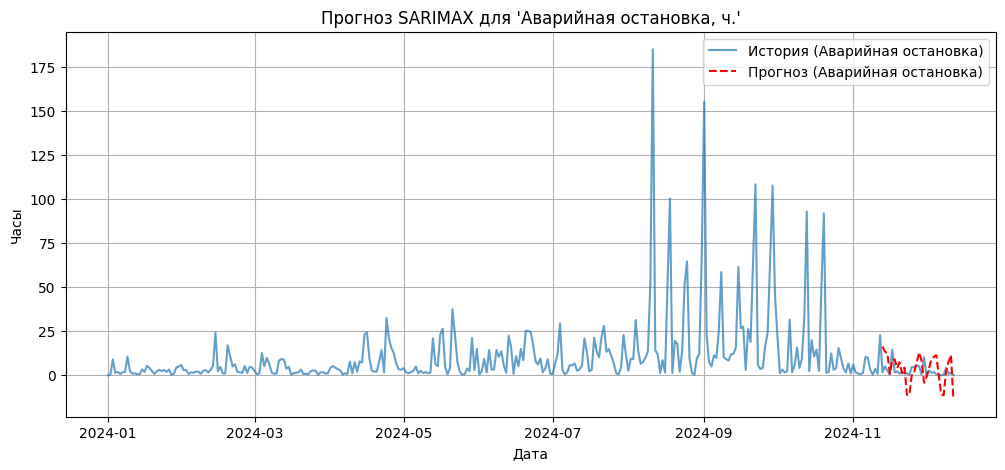

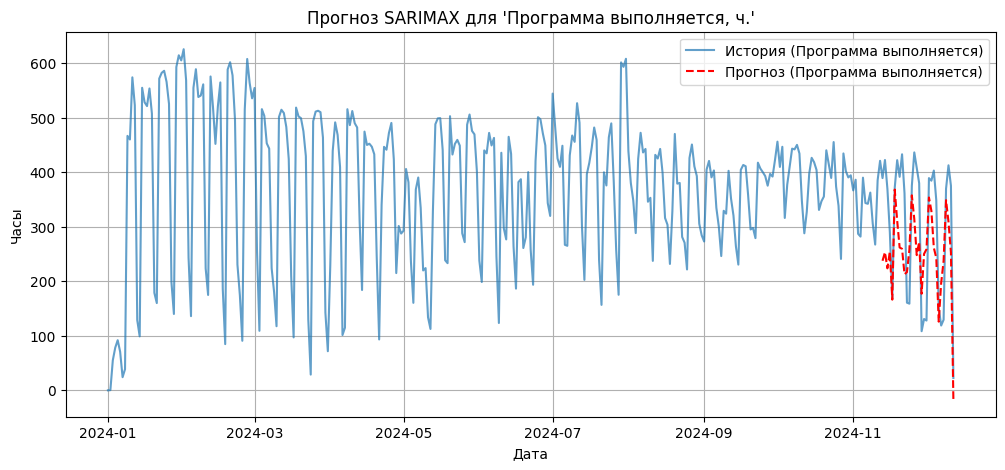

Метрика  Аварийная остановка, ч. (Обновленная)  \
0     MAE                               6.815321   
1    RMSE                               8.160232   

   Программа выполняется, ч. (Обновленная)  
0                                92.841582  
1                               106.170894

In [126]:
# Обновляем список экзогенных переменных на основе значимости
significant_exog_ao = ["Станок под нагрузкой, ч.", "Отсутствие программы, ч.", "Станок включен, работы не производятся, ч."]
significant_exog_prog = ["Прогрев станка, ч.", "Серийное производство, ч.", "Отработка программы, ч.", 
                          "Регламентированный перерыв, ч.", "Станок включен, работы не производятся, ч.", "Станок выключен, ч."]

# Переобучаем модель для "Аварийная остановка, ч."
sarima_ao_significant = SARIMAX(df_aggregated["Аварийная остановка, ч."], 
                                order=(2, 1, 1), 
                                seasonal_order=(2, 0, [1, 2], 7), 
                                exog=df_aggregated[significant_exog_ao],
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

# Переобучаем модель для "Программа выполняется, ч."
sarima_prog_significant = SARIMAX(df_aggregated["Программа выполняется, ч."], 
                                  order=(1, 0, 0), 
                                  seasonal_order=(2, 0, 0, 7), 
                                  exog=df_aggregated[significant_exog_prog],
                                  enforce_stationarity=False,
                                  enforce_invertibility=False).fit()

# Прогноз на тестовой выборке
forecast_ao_test_significant = sarima_ao_significant.forecast(steps=30, exog=test_ao[significant_exog_ao])
forecast_prog_test_significant = sarima_prog_significant.forecast(steps=30, exog=test_prog[significant_exog_prog])

# Визуализация прогноза для "Аварийная остановка, ч."
plt.figure(figsize=(12, 5))
plt.plot(df_aggregated.index, df_aggregated["Аварийная остановка, ч."], label="История (Аварийная остановка)", alpha=0.7)
plt.plot(test_ao.index, forecast_ao_test_significant, label="Прогноз (Аварийная остановка)", linestyle="dashed", color="red")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.title("Прогноз SARIMAX для 'Аварийная остановка, ч.'")
plt.legend()
plt.grid(True)
plt.show()

# Визуализация прогноза для "Программа выполняется, ч."
plt.figure(figsize=(12, 5))
plt.plot(df_aggregated.index, df_aggregated["Программа выполняется, ч."], label="История (Программа выполняется)", alpha=0.7)
plt.plot(test_prog.index, forecast_prog_test_significant, label="Прогноз (Программа выполняется)", linestyle="dashed", color="red")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.title("Прогноз SARIMAX для 'Программа выполняется, ч.'")
plt.legend()
plt.grid(True)
plt.show()


# Вычисляем ошибки для модели с отобранными переменными
mae_ao_significant = mean_absolute_error(test_ao["Аварийная остановка, ч."], forecast_ao_test_significant)
rmse_ao_significant = np.sqrt(mean_squared_error(test_ao["Аварийная остановка, ч."], forecast_ao_test_significant))

mae_prog_significant = mean_absolute_error(test_prog["Программа выполняется, ч."], forecast_prog_test_significant)
rmse_prog_significant = np.sqrt(mean_squared_error(test_prog["Программа выполняется, ч."], forecast_prog_test_significant))

# Выводим новые ошибки
errors_significant_df = pd.DataFrame({
    "Метрика": ["MAE", "RMSE"],
    "Аварийная остановка, ч. (Обновленная)": [mae_ao_significant, rmse_ao_significant],
    "Программа выполняется, ч. (Обновленная)": [mae_prog_significant, rmse_prog_significant]
})

# Отображаем новые ошибки
errors_significant_df


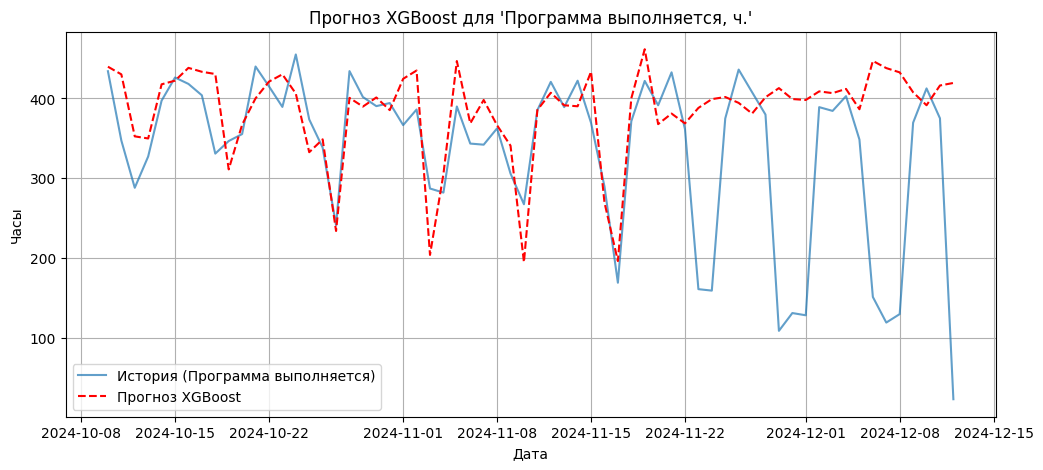

Метрика  Программа выполняется, ч. (XGBoost)
0     MAE                            68.182223
1    RMSE                           116.484078

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Создание лаговых признаков
def create_lag_features(df, target_column, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f"{target_column}_lag{lag}"] = df[target_column].shift(lag)
    return df_lagged

# Добавляем лаги для "Программа выполняется, ч."
lags = [1, 7, 14, 30]  # Лаги на 1 день, 1 неделю, 2 недели
df_xgb = create_lag_features(df_aggregated, "Программа выполняется, ч.", lags)

# Убираем пропущенные значения (они появляются из-за лагов)
df_xgb = df_xgb.dropna()

# Определяем признаки (X) и целевую переменную (y)
X = df_xgb[significant_exog_prog + [f"Программа выполняется, ч._lag{lag}" for lag in lags]]
y = df_xgb["Программа выполняется, ч."]

# Разделяем данные на train/test (80% обучение, 20% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Обучаем XGBoost
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Прогноз на тестовой выборке
xgb_forecast = xgb_model.predict(X_test)

# Оценка точности XGBoost
mae_xgb = mean_absolute_error(y_test, xgb_forecast)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_forecast))

# Визуализация прогноза XGBoost
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="История (Программа выполняется)", alpha=0.7)
plt.plot(y_test.index, xgb_forecast, label="Прогноз XGBoost", linestyle="dashed", color="red")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.title("Прогноз XGBoost для 'Программа выполняется, ч.'")
plt.legend()
plt.grid(True)
plt.show()

# Вывод ошибок
errors_xgb_df = pd.DataFrame({
    "Метрика": ["MAE", "RMSE"],
    "Программа выполняется, ч. (XGBoost)": [mae_xgb, rmse_xgb]
})

# Отображаем ошибки
errors_xgb_df


In [130]:
# Обучаем SARIMAX на исходных данных
sarima_model = SARIMAX(df_aggregated["Программа выполняется, ч."], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 7), 
                       exog=df_aggregated[significant_exog_prog],
                       enforce_stationarity=False,
                       enforce_invertibility=False).fit()

# Прогноз SARIMAX
sarima_forecast = sarima_model.forecast(steps=len(X_test), exog=X_test[significant_exog_prog])

# Вычисляем остатки (ошибку предсказания SARIMAX)
residuals = y_test - sarima_forecast

# Корректируем обучение XGBoost (исправляем размерность labels)
xgb_residual_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_residual_model.fit(X_train, residuals[:len(X_train)])  # Убираем ошибочное обрезание

# Прогноз XGBoost для остатков
xgb_residual_forecast = xgb_residual_model.predict(X_test)

# Итоговый гибридный прогноз (SARIMAX + XGBoost)
hybrid_forecast = sarima_forecast + xgb_residual_forecast

# Оценка точности гибридной модели
mae_hybrid = mean_absolute_error(y_test, hybrid_forecast)
rmse_hybrid = np.sqrt(mean_squared_error(y_test, hybrid_forecast))

# Визуализация прогноза гибридной модели
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="История (Программа выполняется)", alpha=0.7)
plt.plot(y_test.index, hybrid_forecast, label="Гибридный прогноз (SARIMAX + XGBoost)", linestyle="dashed", color="red")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.title("Гибридный прогноз SARIMAX + XGBoost для 'Программа выполняется, ч.'")
plt.legend()
plt.grid(True)
plt.show()

# Вывод ошибок
errors_hybrid_df = pd.DataFrame({
    "Метрика": ["MAE", "RMSE"],
    "Программа выполняется, ч. (Гибридная модель)": [mae_hybrid, rmse_hybrid]
})

errors_hybrid_df

XGBoostError: [16:25:46] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\data\data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (128 vs. 0) : Incorrect size for labels.

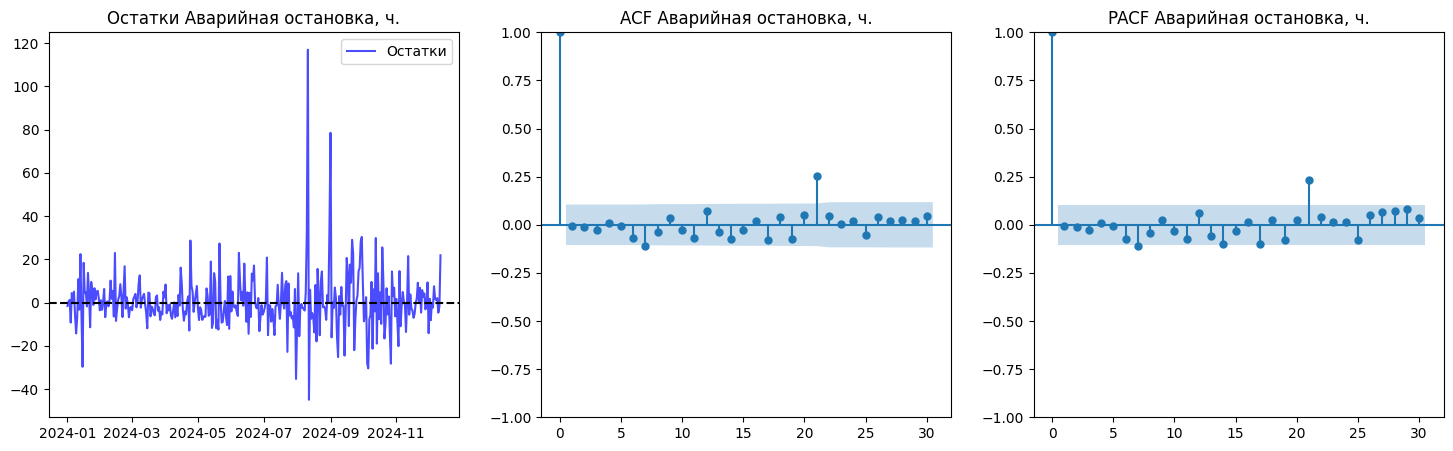

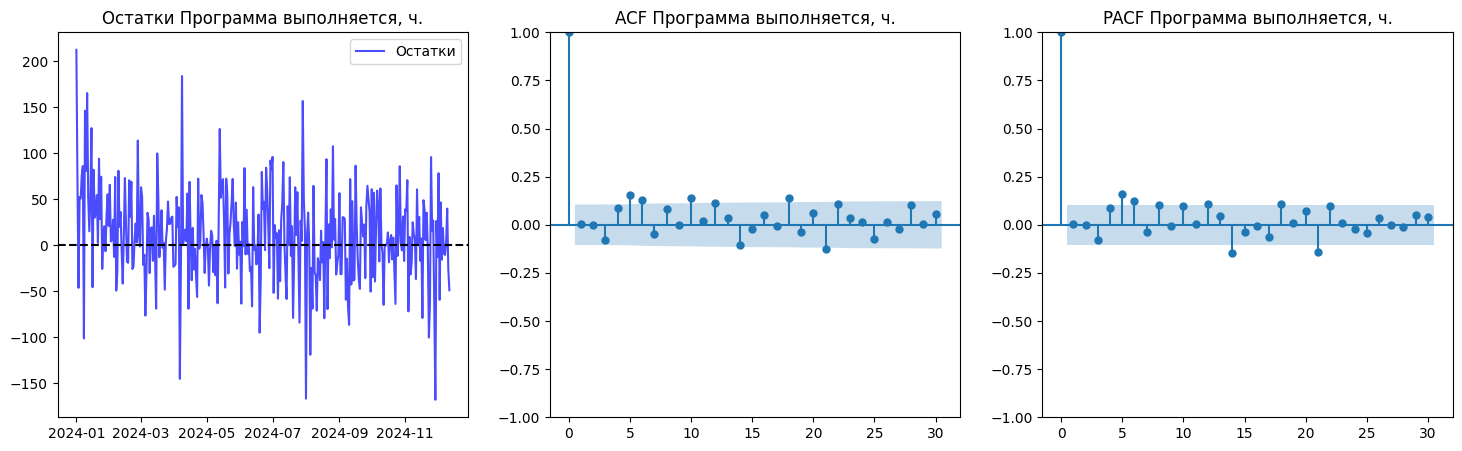

In [124]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Получаем остатки модели
residuals_ao = sarima_ao_significant.resid
residuals_prog = sarima_prog_significant.resid

# Функция для построения графиков ACF, PACF и распределения остатков
def plot_residuals_analysis(residuals, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # График остатков
    axes[0].plot(residuals, label="Остатки", color="blue", alpha=0.7)
    axes[0].axhline(y=0, linestyle="--", color="black")
    axes[0].set_title(f"Остатки {title}")
    axes[0].legend()

    # ACF (автокорреляция)
    sm.graphics.tsa.plot_acf(residuals, ax=axes[1], lags=30)
    axes[1].set_title(f"ACF {title}")

    # PACF (частичная автокорреляция)
    sm.graphics.tsa.plot_pacf(residuals, ax=axes[2], lags=30)
    axes[2].set_title(f"PACF {title}")

    plt.show()

# Анализ остатков для "Аварийная остановка, ч."
plot_residuals_analysis(residuals_ao, "Аварийная остановка, ч.")

# Анализ остатков для "Программа выполняется, ч."
plot_residuals_analysis(residuals_prog, "Программа выполняется, ч.")


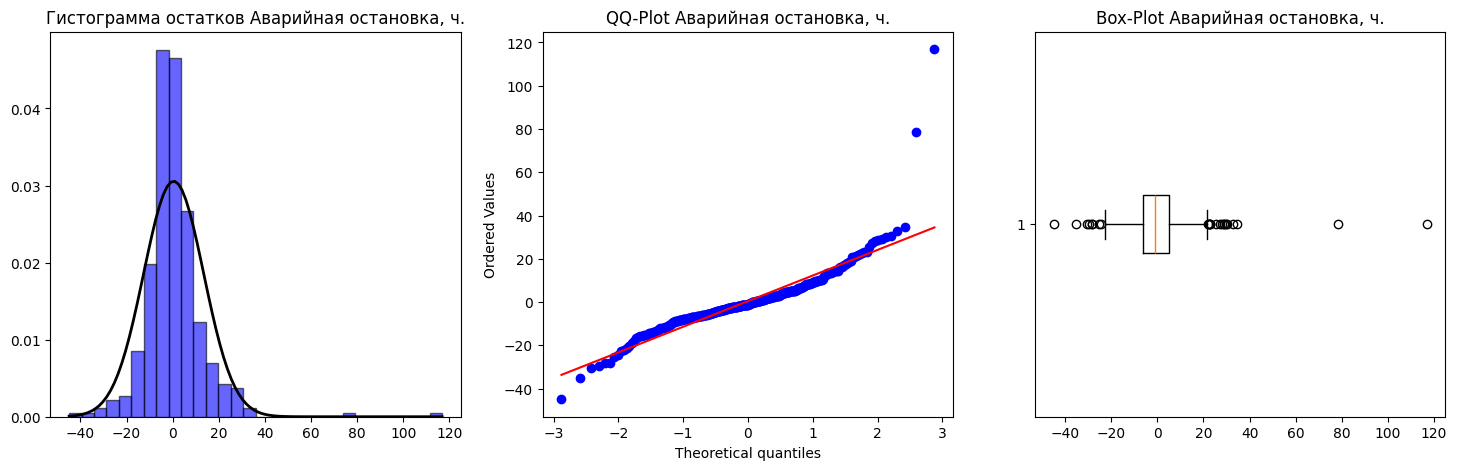

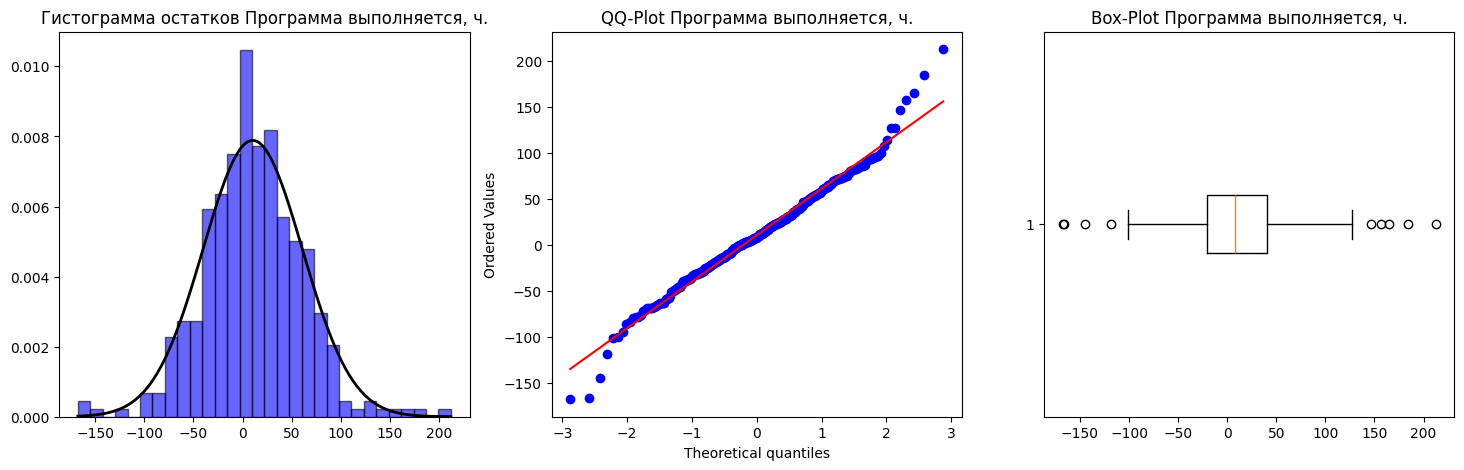

({'Среднее': 0.4450969852198843,
  'Стандартное отклонение': 13.053452564475466,
  'p-value Шапиро-Уилка': 2.3559224824657883e-19,
  'Вывод': 'Не нормально распределены'},
 {'Среднее': 10.3617092967888,
  'Стандартное отклонение': 50.56989741429732,
  'p-value Шапиро-Уилка': 0.000850025068023747,
  'Вывод': 'Не нормально распределены'})

In [125]:
import scipy.stats as stats
import numpy as np

# Функция для проверки нормальности и визуализации распределения остатков
def check_residual_distribution(residuals, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Гистограмма остатков
    axes[0].hist(residuals, bins=30, color='blue', alpha=0.6, edgecolor='black', density=True)
    mu, std = stats.norm.fit(residuals)
    x = np.linspace(min(residuals), max(residuals), 100)
    p = stats.norm.pdf(x, mu, std)
    axes[0].plot(x, p, 'k', linewidth=2)
    axes[0].set_title(f"Гистограмма остатков {title}")

    # QQ-plot (проверка на нормальность)
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title(f"QQ-Plot {title}")

    # Тест Шапиро-Уилка на нормальность
    shapiro_test = stats.shapiro(residuals)
    p_value = shapiro_test.pvalue
    normality_result = "Нормально распределены" if p_value > 0.05 else "Не нормально распределены"

    # Box-Plot (проверка на выбросы)
    axes[2].boxplot(residuals, vert=False)
    axes[2].set_title(f"Box-Plot {title}")

    plt.show()

    return {
        "Среднее": np.mean(residuals),
        "Стандартное отклонение": np.std(residuals),
        "p-value Шапиро-Уилка": p_value,
        "Вывод": normality_result
    }

# Проверка распределения остатков для "Аварийная остановка, ч."
residuals_analysis_ao = check_residual_distribution(residuals_ao, "Аварийная остановка, ч.")

# Проверка распределения остатков для "Программа выполняется, ч."
residuals_analysis_prog = check_residual_distribution(residuals_prog, "Программа выполняется, ч.")

# Вывод результатов теста на нормальность
residuals_analysis_ao, residuals_analysis_prog


# ////////////////////////////////////////////

In [26]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Разделяем данные на train и test (например, последние 30 дней для теста)
train_size = len(df_aggregated) - 30
train = df_aggregated.iloc[:train_size]
test = df_aggregated.iloc[train_size:]

# Обучаем SARIMA на train-данных
sarima_ao = SARIMAX(train["Аварийная остановка, ч."].dropna(),
                    order=(2,1,2),
                    seasonal_order=(1,1,1,7),
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()

sarima_prog = SARIMAX(train["Программа выполняется, ч."].dropna(),
                      order=(2,1,2),
                      seasonal_order=(1,1,1,7),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Прогнозируем на тестовый период (30 дней)
forecast_ao = sarima_ao.forecast(steps=30)
forecast_prog = sarima_prog.forecast(steps=30)

# Убираем NaN из тестовых данных и прогноза
test_clean_ao = test["Аварийная остановка, ч."].dropna()
forecast_clean_ao = forecast_ao[:len(test_clean_ao)].dropna()

test_clean_prog = test["Программа выполняется, ч."].dropna()
forecast_clean_prog = forecast_prog[:len(test_clean_prog)].dropna()

# Пересчитываем метрики без NaN
mape_ao = mean_absolute_percentage_error(test_clean_ao, forecast_clean_ao)
mape_prog = mean_absolute_percentage_error(test_clean_prog, forecast_clean_prog)

rmse_ao = np.sqrt(mean_squared_error(test_clean_ao, forecast_clean_ao))
rmse_prog = np.sqrt(mean_squared_error(test_clean_prog, forecast_clean_prog))

# Выводим исправленные метрики
print(f"MAPE (Аварийная остановка): {mape_ao:.2%}")
print(f"RMSE (Аварийная остановка): {rmse_ao:.2f}")

print(f"MAPE (Программа выполняется): {mape_prog:.2%}")
print(f"RMSE (Программа выполняется): {rmse_prog:.2f}")



c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency i

MAPE (Аварийная остановка): 1263.53%
RMSE (Аварийная остановка): 10.51
MAPE (Программа выполняется): 107.49%
RMSE (Программа выполняется): 99.08


c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
09:54:58 - cmdstanpy - INFO - Chain [1] start processing
09:54:58 - cmdstanpy - INFO - Chain [1] done processing
09:54:58 - cmdstanpy - INFO - Chain [1] start processing
09:54:58 - cmdstanpy - INFO - Chain [1] done processing


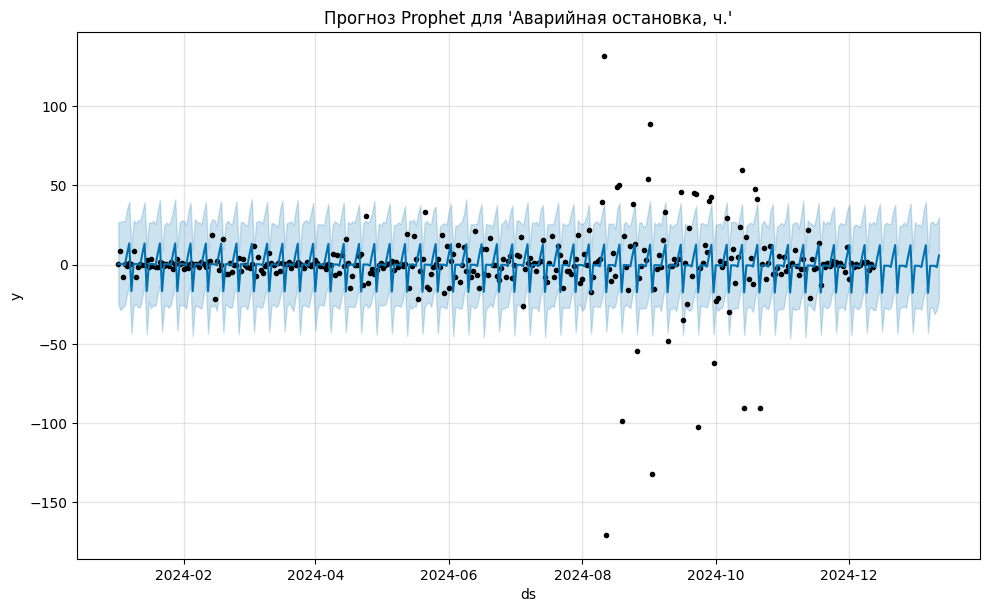

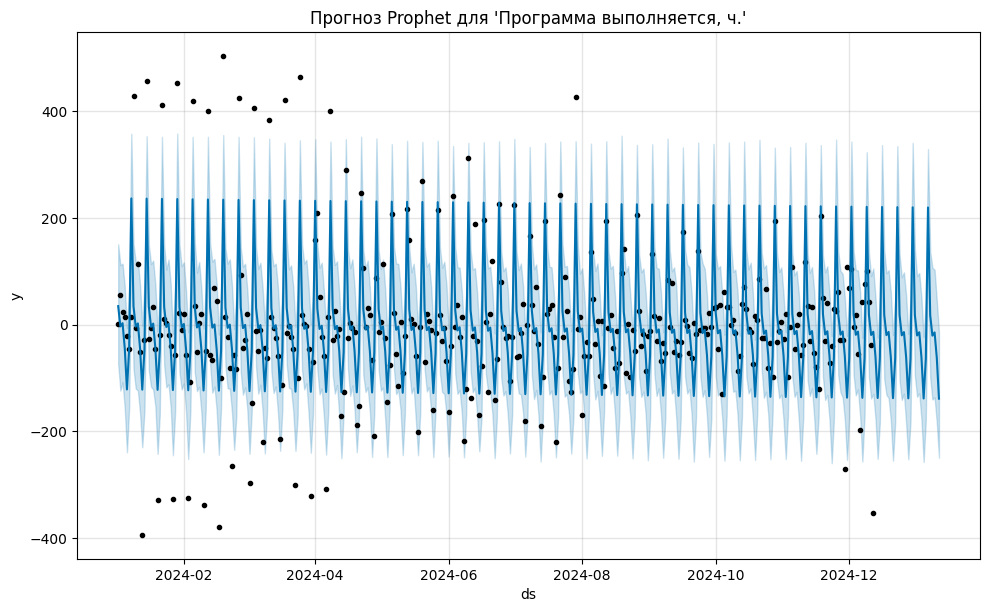

In [27]:
from prophet import Prophet

# Функция для подготовки данных и прогнозирования с помощью Prophet
def forecast_with_prophet(df, column, periods=30):
    # Подготовка данных для Prophet
    df_prophet = df[[column]].reset_index()
    df_prophet.columns = ['ds', 'y']  # Prophet требует такие названия столбцов

    # Создание и обучение модели
    model = Prophet()
    model.fit(df_prophet)

    # Создание будущего датафрейма
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    return model, forecast

# Прогноз для "Аварийная остановка, ч."
model_ao, forecast_ao = forecast_with_prophet(df_aggregated, "Аварийная остановка, ч.")

# Прогноз для "Программа выполняется, ч."
model_prog, forecast_prog = forecast_with_prophet(df_aggregated, "Программа выполняется, ч.")

# Визуализация прогноза для "Аварийная остановка, ч."
fig_ao = model_ao.plot(forecast_ao)
plt.title("Прогноз Prophet для 'Аварийная остановка, ч.'")
plt.show()

# Визуализация прогноза для "Программа выполняется, ч."
fig_prog = model_prog.plot(forecast_prog)
plt.title("Прогноз Prophet для 'Программа выполняется, ч.'")
plt.show()


In [28]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Выбираем последние 30 дней фактических данных
actual_ao = df_aggregated["Аварийная остановка, ч."].iloc[-30:].values
actual_prog = df_aggregated["Программа выполняется, ч."].iloc[-30:].values

# Выбираем прогнозные значения Prophet за 30 дней
forecast_ao_values = forecast_ao["yhat"].iloc[-30:].values
forecast_prog_values = forecast_prog["yhat"].iloc[-30:].values

# Вычисление MAPE и RMSE
mape_ao = mean_absolute_percentage_error(actual_ao, forecast_ao_values) * 100
rmse_ao = np.sqrt(mean_squared_error(actual_ao, forecast_ao_values))

mape_prog = mean_absolute_percentage_error(actual_prog, forecast_prog_values) * 100
rmse_prog = np.sqrt(mean_squared_error(actual_prog, forecast_prog_values))

# Вывод результатов
mape_rmse_results = {
    "MAPE (Аварийная остановка, ч.)": f"{mape_ao:.2f}%",
    "RMSE (Аварийная остановка, ч.)": f"{rmse_ao:.2f}",
    "MAPE (Программа выполняется, ч.)": f"{mape_prog:.2f}%",
    "RMSE (Программа выполняется, ч.)": f"{rmse_prog:.2f}"
}

mape_rmse_results


{'MAPE (Аварийная остановка, ч.)': '520.18%',
 'RMSE (Аварийная остановка, ч.)': '11.11',
 'MAPE (Программа выполняется, ч.)': '183.24%',
 'RMSE (Программа выполняется, ч.)': '131.60'}

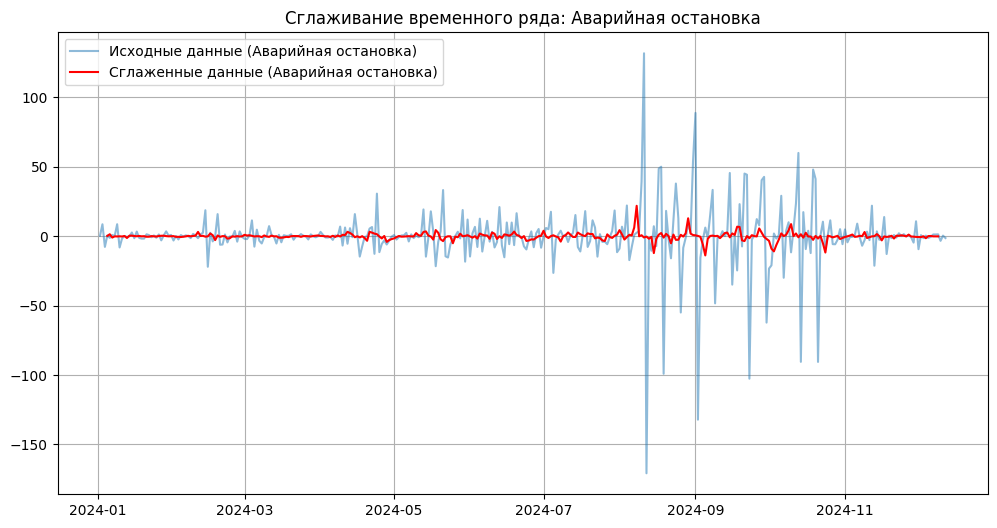

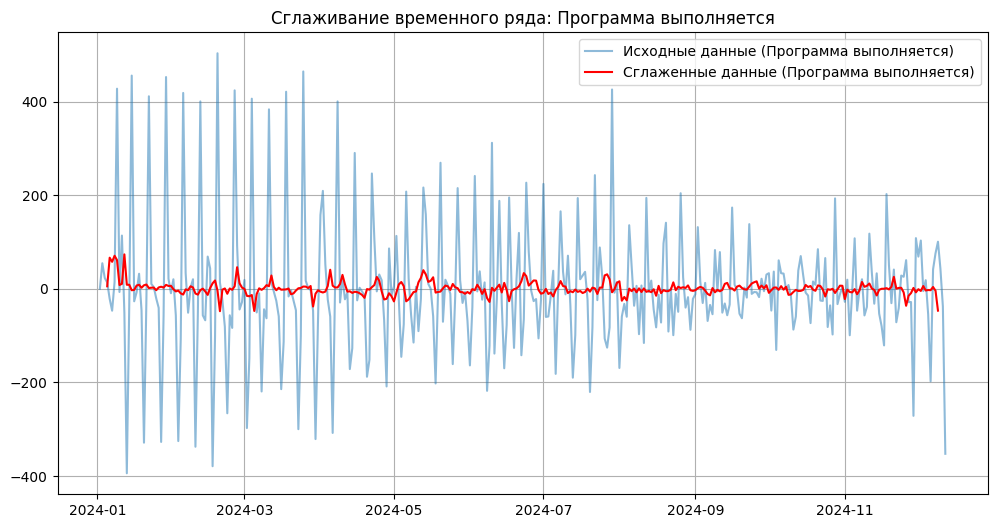

In [29]:
# Применение скользящего среднего для сглаживания
df_smoothed = df_aggregated.copy()
df_smoothed["Аварийная остановка, ч."] = df_aggregated["Аварийная остановка, ч."].rolling(window=7, center=True).mean()
df_smoothed["Программа выполняется, ч."] = df_aggregated["Программа выполняется, ч."].rolling(window=7, center=True).mean()

# Удаление пропущенных значений после сглаживания
df_smoothed = df_smoothed.dropna()

# Визуализация сглаженных данных
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_aggregated["Аварийная остановка, ч."], label="Исходные данные (Аварийная остановка)", alpha=0.5)
plt.plot(df_smoothed["Аварийная остановка, ч."], label="Сглаженные данные (Аварийная остановка)", color="red")
plt.title("Сглаживание временного ряда: Аварийная остановка")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_aggregated["Программа выполняется, ч."], label="Исходные данные (Программа выполняется)", alpha=0.5)
plt.plot(df_smoothed["Программа выполняется, ч."], label="Сглаженные данные (Программа выполняется)", color="red")
plt.title("Сглаживание временного ряда: Программа выполняется")
plt.legend()
plt.grid()
plt.show()


09:54:59 - cmdstanpy - INFO - Chain [1] start processing
09:54:59 - cmdstanpy - INFO - Chain [1] done processing
09:54:59 - cmdstanpy - INFO - Chain [1] start processing
09:54:59 - cmdstanpy - INFO - Chain [1] done processing


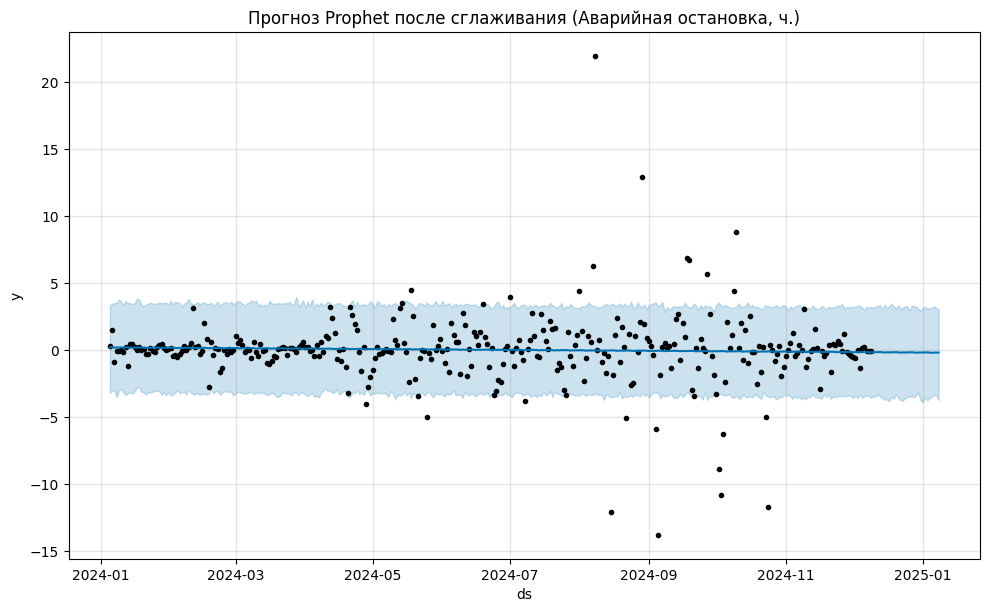

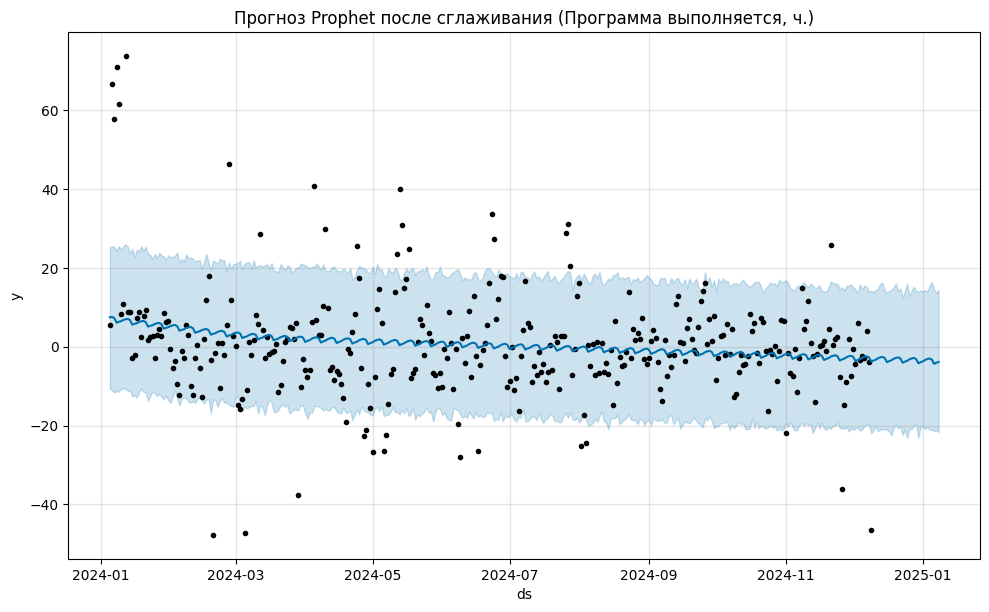

In [30]:
# Функция для прогнозирования с Prophet на сглаженных данных
def forecast_with_prophet(df, column, periods=30):
    df_prophet = df[[column]].reset_index()
    df_prophet.columns = ['ds', 'y']

    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    return model, forecast

# Прогноз для "Аварийная остановка, ч." на сглаженных данных
model_ao_smoothed, forecast_ao_smoothed = forecast_with_prophet(df_smoothed, "Аварийная остановка, ч.")

# Прогноз для "Программа выполняется, ч." на сглаженных данных
model_prog_smoothed, forecast_prog_smoothed = forecast_with_prophet(df_smoothed, "Программа выполняется, ч.")

# Визуализация прогноза для "Аварийная остановка, ч."
fig_ao = model_ao_smoothed.plot(forecast_ao_smoothed)
plt.title("Прогноз Prophet после сглаживания (Аварийная остановка, ч.)")
plt.show()

# Визуализация прогноза для "Программа выполняется, ч."
fig_prog = model_prog_smoothed.plot(forecast_prog_smoothed)
plt.title("Прогноз Prophet после сглаживания (Программа выполняется, ч.)")
plt.show()


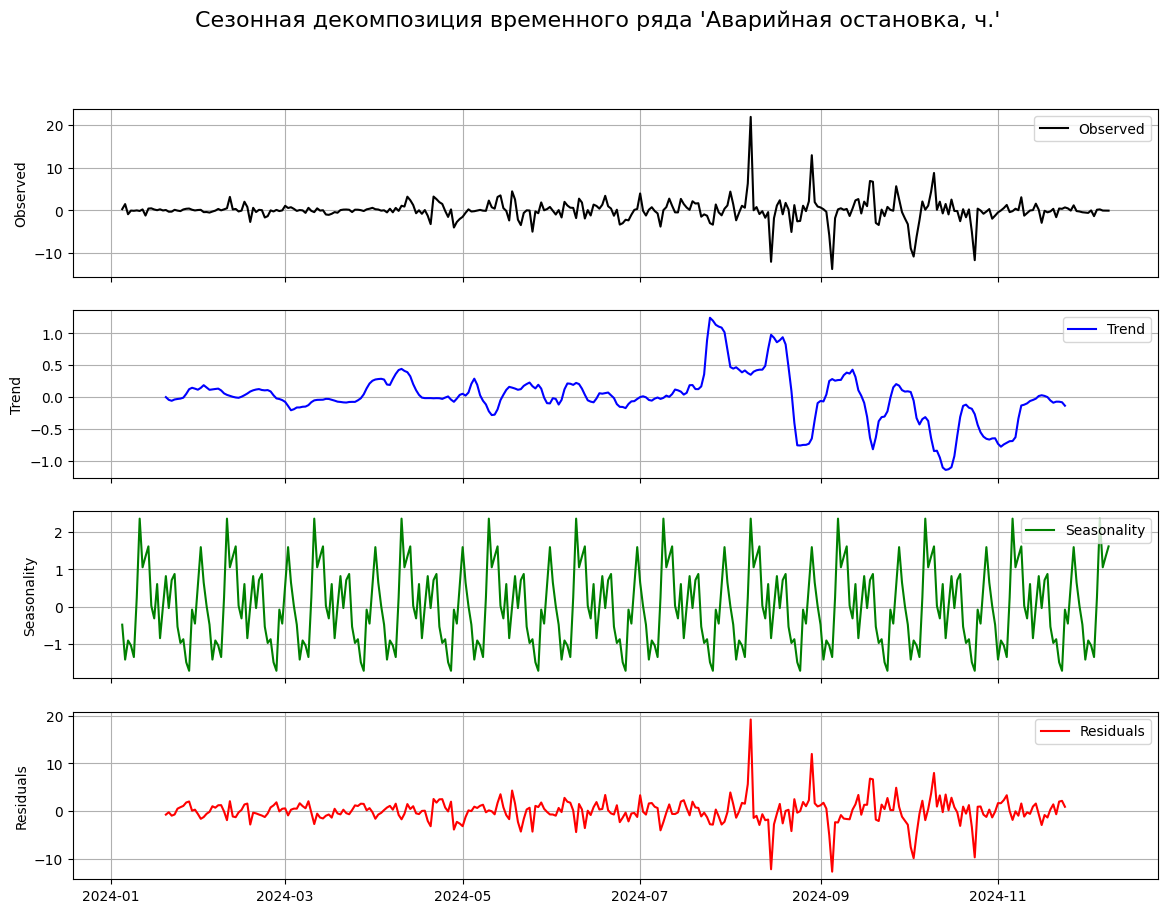

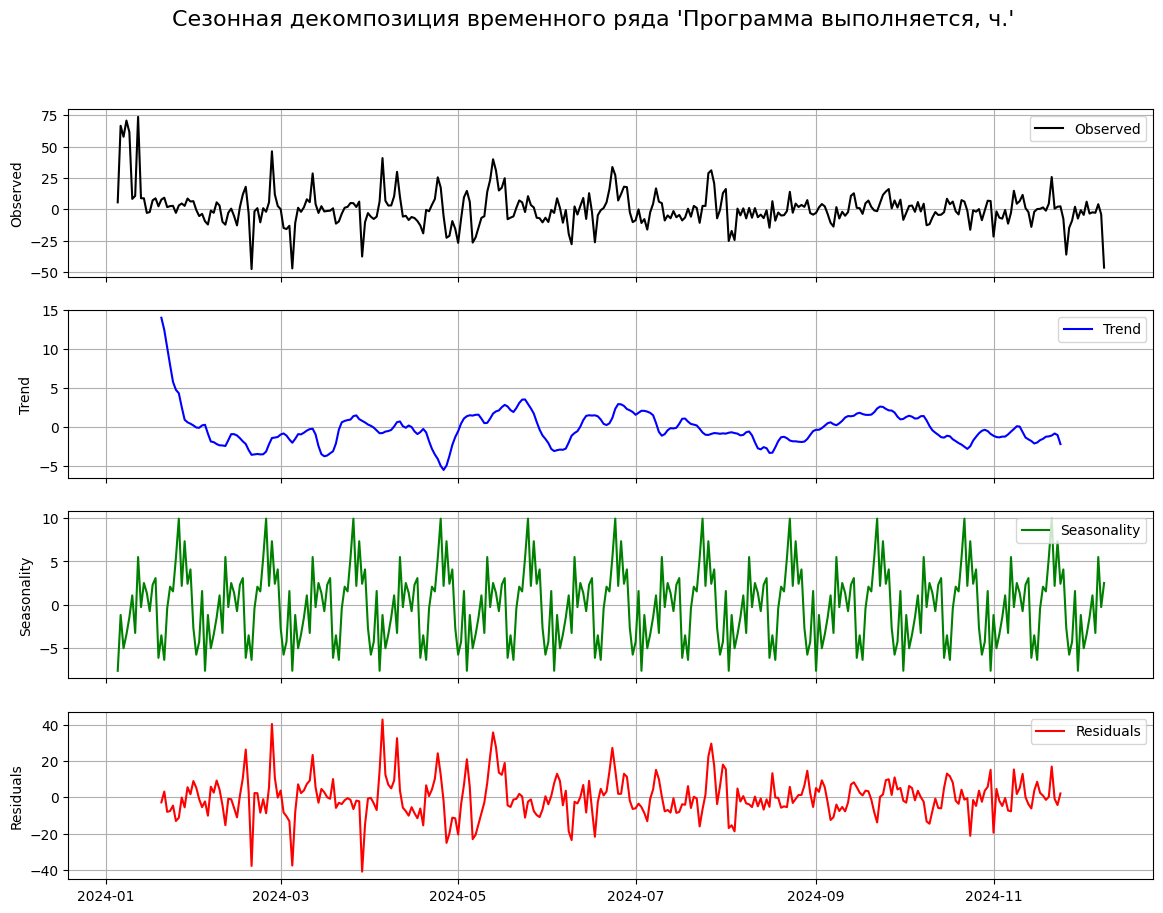

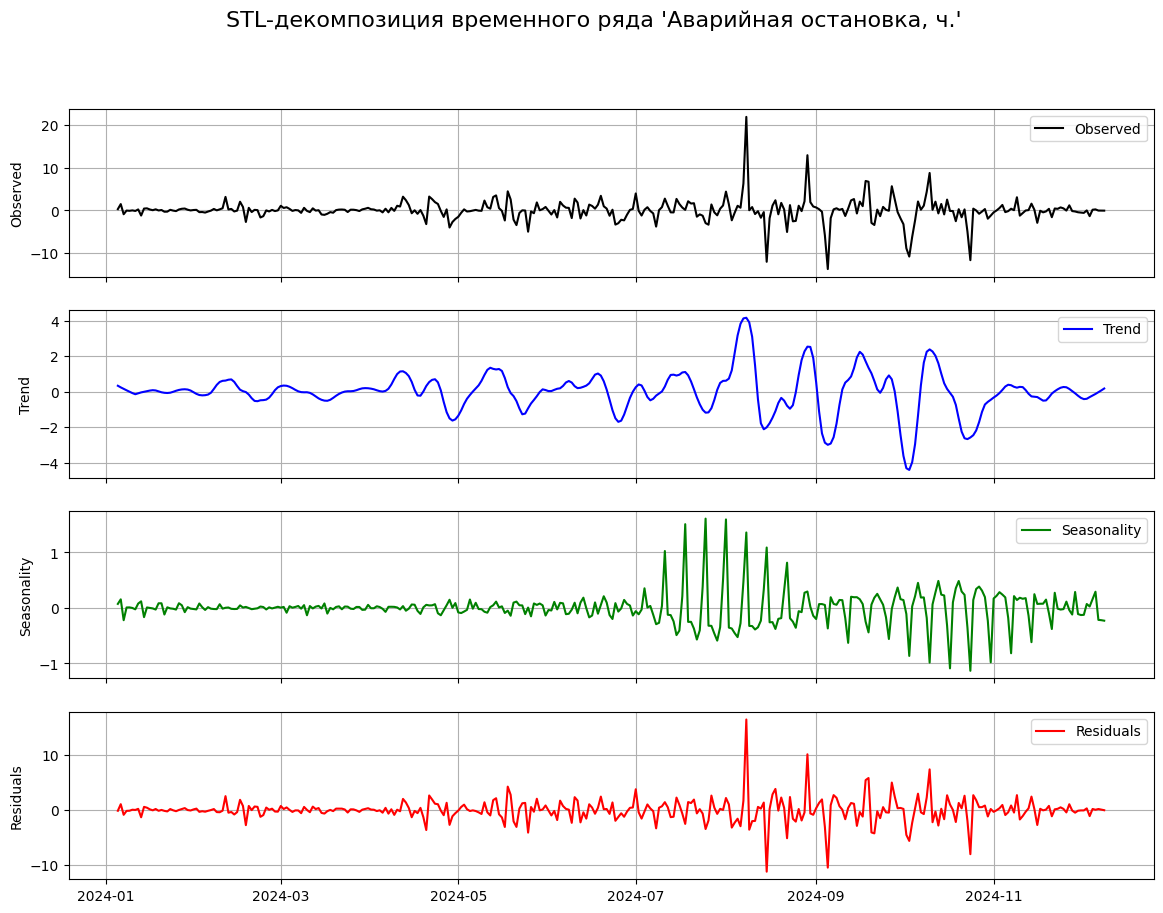

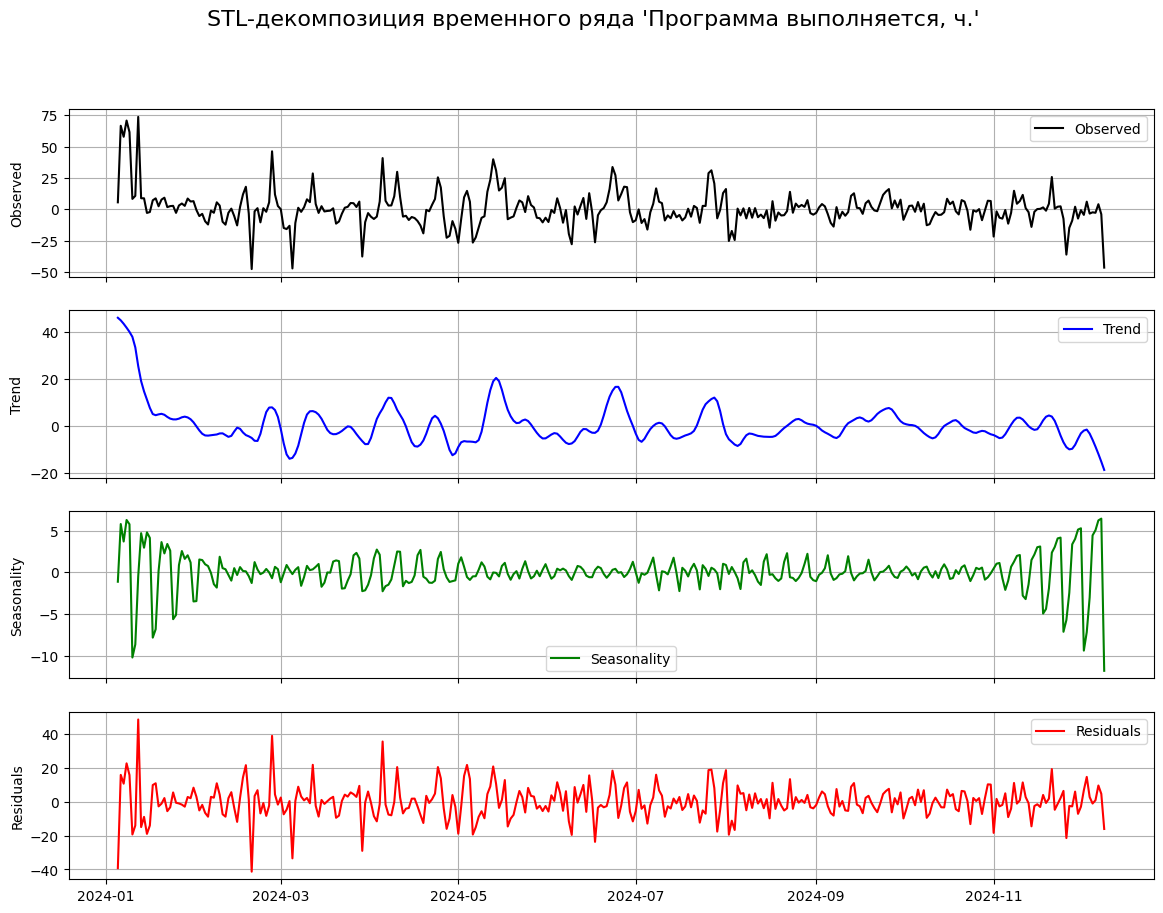

In [31]:
column_names = ["Аварийная остановка, ч.", "Программа выполняется, ч."]
decompose_df(df_smoothed, column_names)
decompose_df_stl(df_smoothed, column_names)

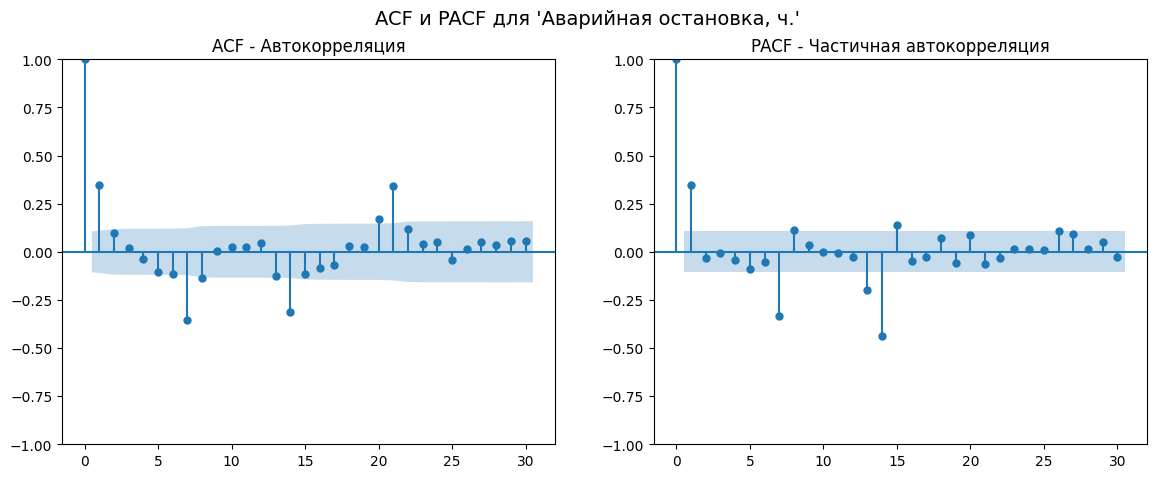

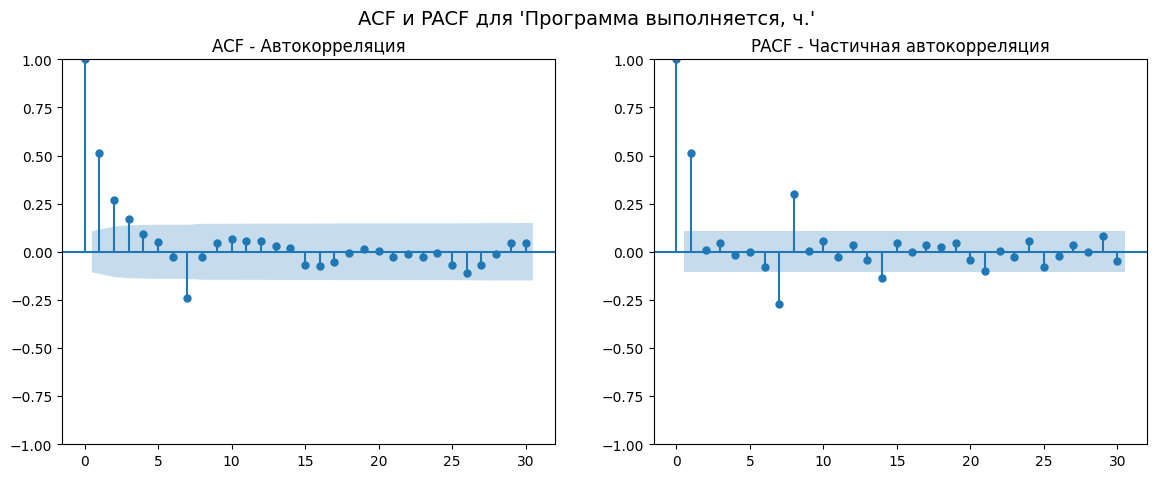

In [32]:
built_acf_and_pacf(df_smoothed, column_names)

In [33]:
# Выбираем последние 30 дней фактических данных после сглаживания
actual_ao_smoothed = df_smoothed["Аварийная остановка, ч."].iloc[-30:].values
actual_prog_smoothed = df_smoothed["Программа выполняется, ч."].iloc[-30:].values

# Выбираем прогнозные значения Prophet за 30 дней после сглаживания
forecast_ao_values_smoothed = forecast_ao_smoothed["yhat"].iloc[-30:].values
forecast_prog_values_smoothed = forecast_prog_smoothed["yhat"].iloc[-30:].values

# Вычисление MAPE и RMSE после сглаживания
mape_ao_smoothed = mean_absolute_percentage_error(actual_ao_smoothed, forecast_ao_values_smoothed) * 100
rmse_ao_smoothed = np.sqrt(mean_squared_error(actual_ao_smoothed, forecast_ao_values_smoothed))

mape_prog_smoothed = mean_absolute_percentage_error(actual_prog_smoothed, forecast_prog_values_smoothed) * 100
rmse_prog_smoothed = np.sqrt(mean_squared_error(actual_prog_smoothed, forecast_prog_values_smoothed))

# Вывод результатов после сглаживания
mape_rmse_smoothed_results = {
    "MAPE (Аварийная остановка, ч.) после сглаживания": f"{mape_ao_smoothed:.2f}%",
    "RMSE (Аварийная остановка, ч.) после сглаживания": f"{rmse_ao_smoothed:.2f}",
    "MAPE (Программа выполняется, ч.) после сглаживания": f"{mape_prog_smoothed:.2f}%",
    "RMSE (Программа выполняется, ч.) после сглаживания": f"{rmse_prog_smoothed:.2f}"
}

mape_rmse_smoothed_results


{'MAPE (Аварийная остановка, ч.) после сглаживания': '154.26%',
 'RMSE (Аварийная остановка, ч.) после сглаживания': '0.83',
 'MAPE (Программа выполняется, ч.) после сглаживания': '268.25%',
 'RMSE (Программа выполняется, ч.) после сглаживания': '12.63'}

c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:           Аварийная остановка, ч.   No. Observations:                  340
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -752.015
Date:                           Tue, 21 Jan 2025   AIC                           1516.030
Time:                                   09:55:02   BIC                           1538.696
Sample:                               01-05-2024   HQIC                          1525.078
                                    - 12-09-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3632      0.040      9.077      0.000       0.285       0.442
ar.L2         -0.0443      0.087     -0.509

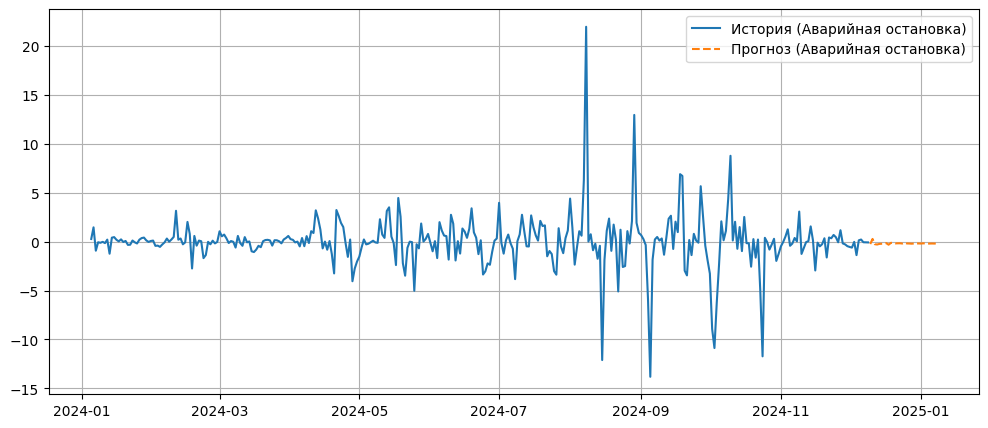

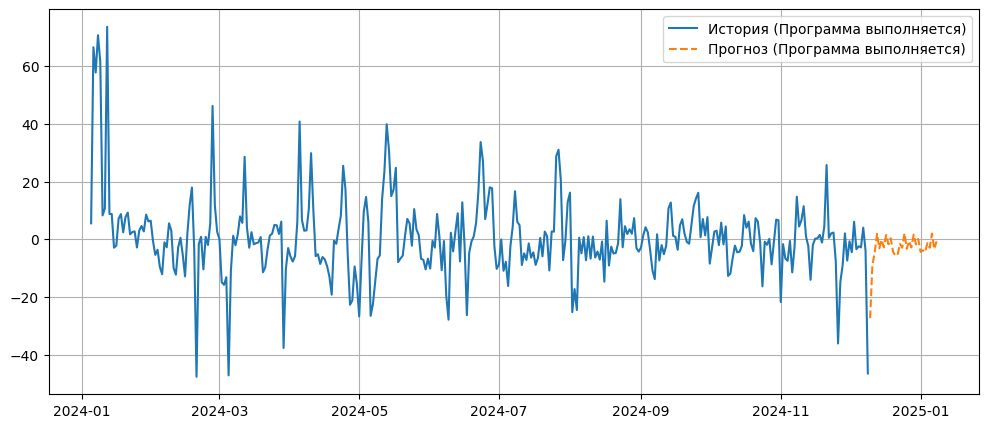

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Обучаем SARIMA для "Аварийная остановка, ч."
sarima_ao = SARIMAX(df_smoothed["Аварийная остановка, ч."], 
                    order=(2, 1, 1),  # (p, d, q)
                    seasonal_order=(1, 1, 1, 7),  # (P, D, Q, s)
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()

# Обучаем SARIMA для "Программа выполняется, ч."
sarima_prog = SARIMAX(df_smoothed["Программа выполняется, ч."], 
                      order=(2, 1, 1),
                      seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Выводим краткие результаты
print(sarima_ao.summary())
print(sarima_prog.summary())

# Прогноз на следующий месяц (30 дней)
forecast_ao = sarima_ao.forecast(steps=30)
forecast_prog = sarima_prog.forecast(steps=30)

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_smoothed["Аварийная остановка, ч."], label="История (Аварийная остановка)")
plt.plot(forecast_ao, label="Прогноз (Аварийная остановка)", linestyle="dashed")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df_smoothed["Программа выполняется, ч."], label="История (Программа выполняется)")
plt.plot(forecast_prog, label="Прогноз (Программа выполняется)", linestyle="dashed")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Разделяем данные на train и test (например, последние 30 дней для теста)
train_size = len(df_smoothed) - 30
train = df_smoothed.iloc[:train_size]
test = df_smoothed.iloc[train_size:]

# Обучаем SARIMA на train-данных
sarima_ao = SARIMAX(train["Аварийная остановка, ч."].dropna(),
                    order=(2,1,1),
                    seasonal_order=(1,1,1,7),
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()

sarima_prog = SARIMAX(train["Программа выполняется, ч."].dropna(),
                      order=(2,1,1),
                      seasonal_order=(1,1,1,12),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Прогнозируем на тестовый период (30 дней)
forecast_ao = sarima_ao.forecast(steps=30)
forecast_prog = sarima_prog.forecast(steps=30)

# Убираем NaN из тестовых данных и прогноза
test_clean_ao = test["Аварийная остановка, ч."].dropna()
forecast_clean_ao = forecast_ao[:len(test_clean_ao)].dropna()

test_clean_prog = test["Программа выполняется, ч."].dropna()
forecast_clean_prog = forecast_prog[:len(test_clean_prog)].dropna()

# Пересчитываем метрики без NaN
mape_ao = mean_absolute_percentage_error(test_clean_ao, forecast_clean_ao)
mape_prog = mean_absolute_percentage_error(test_clean_prog, forecast_clean_prog)

rmse_ao = np.sqrt(mean_squared_error(test_clean_ao, forecast_clean_ao))
rmse_prog = np.sqrt(mean_squared_error(test_clean_prog, forecast_clean_prog))

# Выводим исправленные метрики
print(f"MAPE (Аварийная остановка): {mape_ao:.2%}")
print(f"RMSE (Аварийная остановка): {rmse_ao:.2f}")

print(f"MAPE (Программа выполняется): {mape_prog:.2%}")
print(f"RMSE (Программа выполняется): {rmse_prog:.2f}")



c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE (Аварийная остановка): 130.60%
RMSE (Аварийная остановка): 0.80
MAPE (Программа выполняется): 185.60%
RMSE (Программа выполняется): 12.97


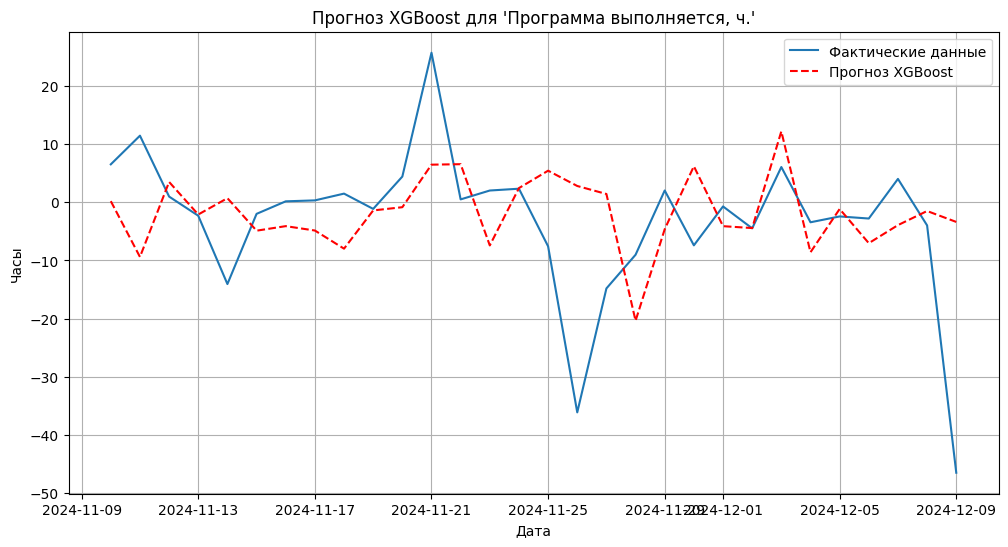

{'MAPE (XGBoost)': '323.65%', 'RMSE (XGBoost)': '13.79'}

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Подготовка данных для XGBoost
df_xgb = df_smoothed.copy()
df_xgb['day_of_week'] = df_xgb.index.dayofweek  # День недели как фича
df_xgb['day_of_month'] = df_xgb.index.day  # День месяца
df_xgb['month'] = df_xgb.index.month  # Месяц

# Создание лагов для "Программа выполняется, ч."
for lag in range(1, 8):  # 7-дневный лаг
    df_xgb[f'lag_{lag}'] = df_xgb['Программа выполняется, ч.'].shift(lag)

# Удаление NaN после лагов
df_xgb = df_xgb.dropna()

# Разделение данных на train и test
X = df_xgb.drop(columns=['Программа выполняется, ч.'])
y = df_xgb['Программа выполняется, ч.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle=False)

# Обучение модели XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# Прогноз на тестовом периоде
y_pred_xgb = xgb_model.predict(X_test)

# Визуализация прогноза XGBoost
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Фактические данные")
plt.plot(y_test.index, y_pred_xgb, linestyle="dashed", label="Прогноз XGBoost", color="red")
plt.title("Прогноз XGBoost для 'Программа выполняется, ч.'")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.legend()
plt.grid()
plt.show()

# Вычисление ошибок MAPE и RMSE
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Вывод результатов XGBoost
xgb_results = {
    "MAPE (XGBoost)": f"{mape_xgb:.2f}%",
    "RMSE (XGBoost)": f"{rmse_xgb:.2f}"
}

xgb_results


c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


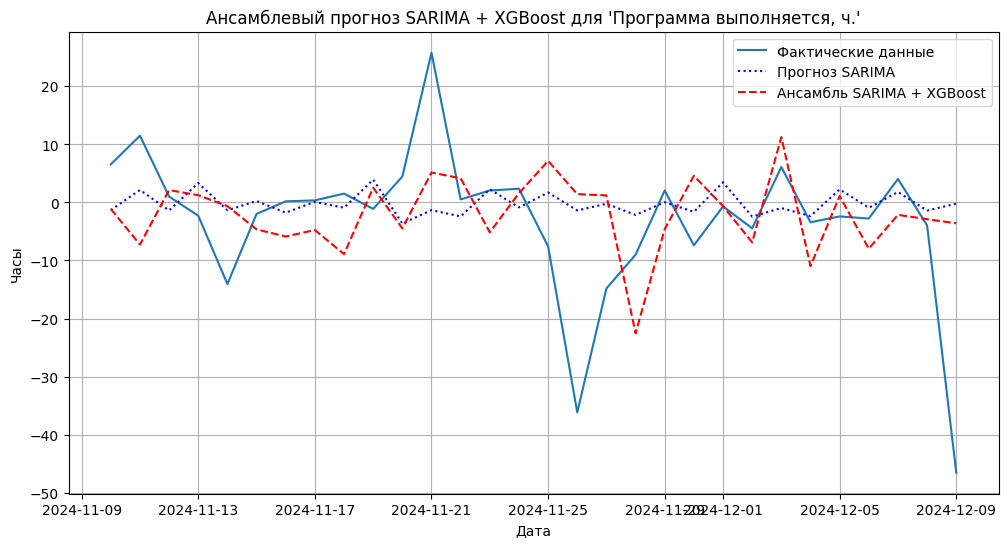

{'MAPE (SARIMA + XGBoost)': '343.28%', 'RMSE (SARIMA + XGBoost)': '13.70'}

In [37]:
# 1. Обучение SARIMA на "Программа выполняется, ч."
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Разделяем данные на train и test (30 дней для теста)
train_size = len(df_smoothed) - 30
train = df_smoothed.iloc[:train_size]
test = df_smoothed.iloc[train_size:]

# Обучаем SARIMA
sarima_model = SARIMAX(train["Программа выполняется, ч."],
                       order=(2, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False).fit()

# Прогноз SARIMA
sarima_forecast = sarima_model.forecast(steps=30)

# 2. Вычисление остатков (errors)
residuals = test["Программа выполняется, ч."] - sarima_forecast

# 3. Обучение XGBoost на остатках
# Подготовка данных
df_xgb = df_smoothed.copy()
df_xgb['day_of_week'] = df_xgb.index.dayofweek  # День недели как фича
df_xgb['day_of_month'] = df_xgb.index.day  # День месяца
df_xgb['month'] = df_xgb.index.month  # Месяц

# Создание лагов
for lag in range(1, 8):  # 7-дневный лаг
    df_xgb[f'lag_{lag}'] = df_xgb['Программа выполняется, ч.'].shift(lag)

# Удаление NaN после лагов
df_xgb = df_xgb.dropna()

# Разделение данных
X = df_xgb.drop(columns=['Программа выполняется, ч.'])
y = df_xgb['Программа выполняется, ч.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle=False)

# Обучение XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Прогноз XGBoost на остатках SARIMA
xgb_correction = xgb_model.predict(X_test)

# Итоговый ансамблевый прогноз = SARIMA-прогноз + XGBoost-прогноз
ensemble_forecast = sarima_forecast.values + xgb_correction

# 4. Визуализация ансамбля SARIMA + XGBoost
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Фактические данные")
plt.plot(y_test.index, sarima_forecast, linestyle="dotted", label="Прогноз SARIMA", color="blue")
plt.plot(y_test.index, ensemble_forecast, linestyle="dashed", label="Ансамбль SARIMA + XGBoost", color="red")
plt.title("Ансамблевый прогноз SARIMA + XGBoost для 'Программа выполняется, ч.'")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.legend()
plt.grid()
plt.show()

# 5. Оценка качества ансамбля (MAPE, RMSE)
mape_ensemble = mean_absolute_percentage_error(y_test, ensemble_forecast) * 100
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_forecast))

# Вывод результатов
ensemble_results = {
    "MAPE (SARIMA + XGBoost)": f"{mape_ensemble:.2f}%",
    "RMSE (SARIMA + XGBoost)": f"{rmse_ensemble:.2f}"
}

ensemble_results


In [42]:
from pmdarima import auto_arima

# Подбор параметров ARIMA для "Аварийная остановка, ч."
auto_arima_ao = auto_arima(
    df_smoothed["Аварийная остановка, ч."],
    seasonal=True,  # ARIMA без сезонности
    m=30,
    stepwise=True,   # Используем пошаговую оптимизацию
    suppress_warnings=True,
    trace=True       # Показываем процесс подбора
)

# Подбор параметров ARIMA для "Программа выполняется, ч."
auto_arima_prog = auto_arima(
    df_smoothed["Программа выполняется, ч."],
    seasonal=True,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

auto_arima_ao.summary(), auto_arima_prog.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[30] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=1624.167, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=1582.914, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=1585.625, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=1622.168, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[30] intercept   : AIC=1582.011, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[30] intercept   : AIC=1582.861, Time=0.21 sec
 ARIMA(1,0,0)(1,0,1)[30] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[30] intercept   : AIC=1583.700, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=1583.708, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=1584.815, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[30] intercept   : AIC=1572.889, Time=0.14 sec
 ARIMA(2,0,1)(1,0,0)[30] intercept   : AIC=1573.698, Time=1.22 sec
 ARIMA(2,0,1)(0,0,1)[30] intercept   : AIC=1573.592, Time=1.10 sec
 ARIMA(2,0,1)(1,0,1)[30] inte

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                      y   No. Observations:                  340
 Model:               SARIMAX(2, 0, 1)   Log Likelihood                -781.445
 Date:                Tue, 21 Jan 2025   AIC                           1570.889
 Time:                        09:59:30   BIC                           1586.205
 Sample:                    01-05-2024   HQIC                          1576.992
                          - 12-09-2024                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          1.2721      0.045     28.494      0.000       1.185       1.360
 ar.L2         -0.3905      0.032    -12.018      0.000      -0.454   

In [45]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Разделяем данные на train и test (например, последние 30 дней для теста)
train_size = len(df_smoothed) - 30
train = df_smoothed.iloc[:train_size]
test = df_smoothed.iloc[train_size:]

# Обучаем SARIMA на train-данных
sarima_ao = SARIMAX(train["Аварийная остановка, ч."].dropna(),
                    order=(2,0,1),
                    seasonal_order=(0,0,0,0),
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()

sarima_prog = SARIMAX(train["Программа выполняется, ч."].dropna(),
                      order=(1,0,0),
                      seasonal_order=(0,0,0,0),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Прогнозируем на тестовый период (30 дней)
forecast_ao = sarima_ao.forecast(steps=30)
forecast_prog = sarima_prog.forecast(steps=30)

# Убираем NaN из тестовых данных и прогноза
test_clean_ao = test["Аварийная остановка, ч."].dropna()
forecast_clean_ao = forecast_ao[:len(test_clean_ao)].dropna()

test_clean_prog = test["Программа выполняется, ч."].dropna()
forecast_clean_prog = forecast_prog[:len(test_clean_prog)].dropna()

# Пересчитываем метрики без NaN
mape_ao = mean_absolute_percentage_error(test_clean_ao, forecast_clean_ao)
mape_prog = mean_absolute_percentage_error(test_clean_prog, forecast_clean_prog)

rmse_ao = np.sqrt(mean_squared_error(test_clean_ao, forecast_clean_ao))
rmse_prog = np.sqrt(mean_squared_error(test_clean_prog, forecast_clean_prog))

# Выводим исправленные метрики
print(f"MAPE (Аварийная остановка): {mape_ao:.2%}")
print(f"RMSE (Аварийная остановка): {rmse_ao:.2f}")

print(f"MAPE (Программа выполняется): {mape_prog:.2%}")
print(f"RMSE (Программа выполняется): {rmse_prog:.2f}")



MAPE (Аварийная остановка): 109.22%
RMSE (Аварийная остановка): 0.93
MAPE (Программа выполняется): 95.54%
RMSE (Программа выполняется): 12.96


c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\admin\Desktop\stanki\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


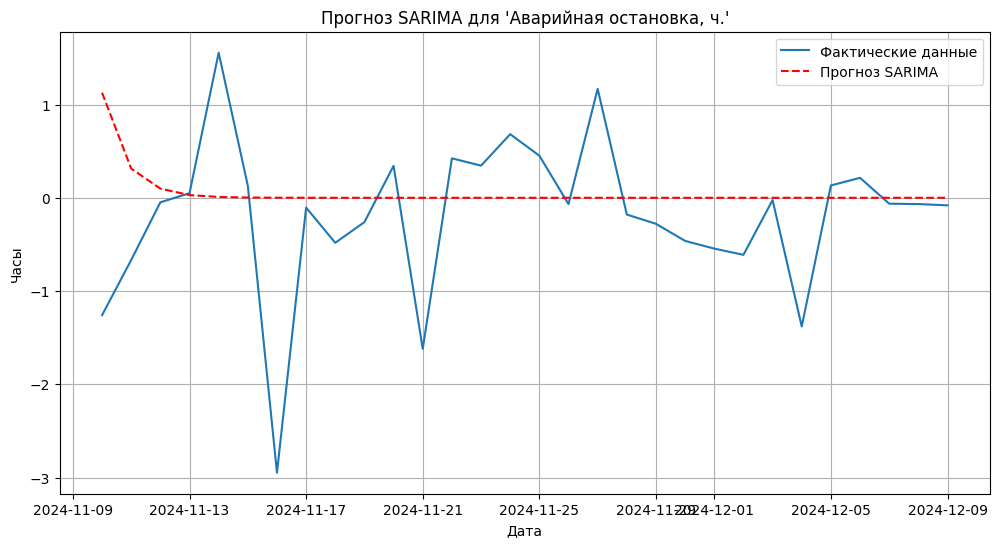

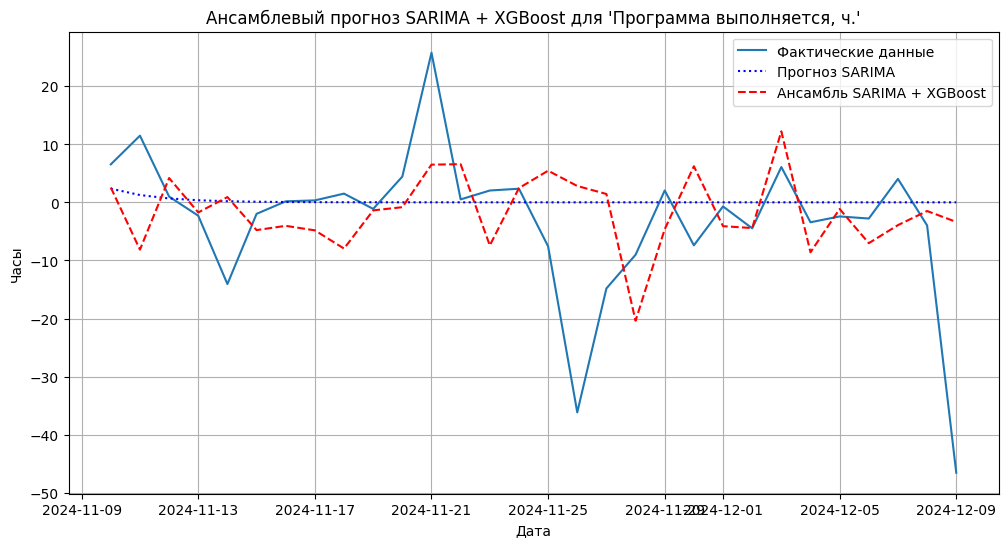

{'MAPE (Аварийная остановка, ч.)': '109.22%',
 'RMSE (Аварийная остановка, ч.)': '0.93',
 'MAPE (SARIMA + XGBoost)': '323.33%',
 'RMSE (SARIMA + XGBoost)': '13.71'}

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Разделяем данные на train и test (30 дней для теста)
train_size = len(df_smoothed) - 30
train = df_smoothed.iloc[:train_size]
test = df_smoothed.iloc[train_size:]

### 1. SARIMA для "Аварийная остановка, ч." ###

# Оптимизированные параметры SARIMA
sarima_ao = SARIMAX(train["Аварийная остановка, ч."].dropna(),
                    order=(2, 0, 1),
                    seasonal_order=(0, 0, 0, 0),
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()

# Прогноз SARIMA
forecast_ao = sarima_ao.forecast(steps=30)

# Оценка качества
mape_ao = mean_absolute_percentage_error(test["Аварийная остановка, ч."].dropna(), forecast_ao) * 100
rmse_ao = np.sqrt(mean_squared_error(test["Аварийная остановка, ч."].dropna(), forecast_ao))

### 2. Гибридный подход (SARIMA + XGBoost) для "Программа выполняется, ч." ###

# SARIMA для тренда "Программа выполняется, ч."
sarima_prog = SARIMAX(train["Программа выполняется, ч."].dropna(),
                      order=(1, 0, 0),
                      seasonal_order=(0, 0, 0, 0),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Прогноз SARIMA
forecast_prog = sarima_prog.forecast(steps=30)

# Остатки (ошибки) SARIMA
residuals = test["Программа выполняется, ч."] - forecast_prog

# Подготовка данных для XGBoost
df_xgb = df_smoothed.copy()
df_xgb['day_of_week'] = df_xgb.index.dayofweek  # День недели как фича
df_xgb['day_of_month'] = df_xgb.index.day  # День месяца
df_xgb['month'] = df_xgb.index.month  # Месяц

# Создание лагов
for lag in range(1, 8):  # 7-дневный лаг
    df_xgb[f'lag_{lag}'] = df_xgb['Программа выполняется, ч.'].shift(lag)

# Удаление NaN после лагов
df_xgb = df_xgb.dropna()

# Разделение данных
X = df_xgb.drop(columns=['Программа выполняется, ч.'])
y = df_xgb['Программа выполняется, ч.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle=False)

# Обучение XGBoost на остатках
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Прогноз XGBoost
xgb_correction = xgb_model.predict(X_test)

# Итоговый ансамблевый прогноз (SARIMA + XGBoost)
ensemble_forecast = forecast_prog.values + xgb_correction

# Оценка качества
mape_ensemble = mean_absolute_percentage_error(y_test, ensemble_forecast) * 100
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_forecast))

# Визуализация прогнозов
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["Аварийная остановка, ч."], label="Фактические данные")
plt.plot(test.index, forecast_ao, linestyle="dashed", label="Прогноз SARIMA", color="red")
plt.title("Прогноз SARIMA для 'Аварийная остановка, ч.'")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Фактические данные")
plt.plot(y_test.index, forecast_prog, linestyle="dotted", label="Прогноз SARIMA", color="blue")
plt.plot(y_test.index, ensemble_forecast, linestyle="dashed", label="Ансамбль SARIMA + XGBoost", color="red")
plt.title("Ансамблевый прогноз SARIMA + XGBoost для 'Программа выполняется, ч.'")
plt.xlabel("Дата")
plt.ylabel("Часы")
plt.legend()
plt.grid()
plt.show()

# Вывод результатов
ensemble_results = {
    "MAPE (Аварийная остановка, ч.)": f"{mape_ao:.2f}%",
    "RMSE (Аварийная остановка, ч.)": f"{rmse_ao:.2f}",
    "MAPE (SARIMA + XGBoost)": f"{mape_ensemble:.2f}%",
    "RMSE (SARIMA + XGBoost)": f"{rmse_ensemble:.2f}"
}

ensemble_results


10:13:12 - cmdstanpy - INFO - Chain [1] start processing
10:13:12 - cmdstanpy - INFO - Chain [1] done processing


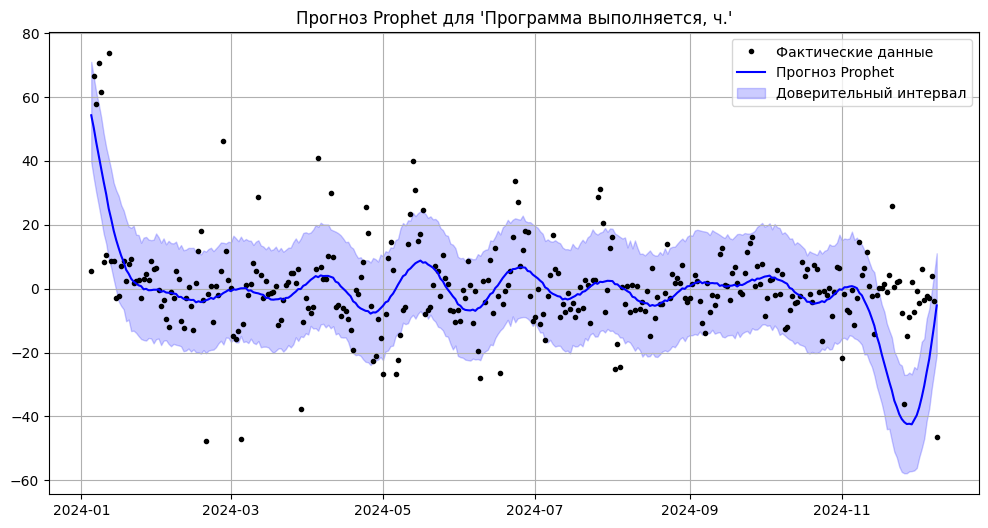

{'MAPE (Prophet)': '1606.14%', 'RMSE (Prophet)': '29.33'}

In [53]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Подготовка данных для Prophet
df_prophet = df_smoothed.reset_index()[["Дата", "Программа выполняется, ч."]].rename(columns={"Дата": "ds", "Программа выполняется, ч.": "y"})

# Разделение на train и test (30 дней для теста)
train_size = len(df_prophet) - 30
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# Создание и обучение модели Prophet
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.05)
prophet_model.fit(train_prophet)

# Прогноз на 30 дней
future = prophet_model.make_future_dataframe(periods=30, freq="D")
forecast_prophet = prophet_model.predict(future)

# Визуализация прогноза
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_prophet["ds"], df_prophet["y"], "k.", label="Фактические данные")
ax.plot(forecast_prophet["ds"], forecast_prophet["yhat"], "b-", label="Прогноз Prophet")
ax.fill_between(forecast_prophet["ds"], forecast_prophet["yhat_lower"], forecast_prophet["yhat_upper"], color="blue", alpha=0.2, label="Доверительный интервал")
ax.set_title("Прогноз Prophet для 'Программа выполняется, ч.'")
ax.legend()
ax.grid()

# Оценка точности прогноза (MAPE, RMSE)
y_test = test_prophet["y"].values
y_pred = forecast_prophet["yhat"].iloc[-30:].values

mape_prophet = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse_prophet = np.sqrt(mean_squared_error(y_test, y_pred))

prophet_results = {
    "MAPE (Prophet)": f"{mape_prophet:.2f}%",
    "RMSE (Prophet)": f"{rmse_prophet:.2f}"
}

plt.show()
prophet_results
